# Plotting 5 Sensors
---
Examples of 5 minute videos. Feel free to choose your own.
1. RELAXED: https://www.youtube.com/watch?v=i50ZAs7v9es
2. SCARY: https://www.youtube.com/watch?v=UY_9dJBM388
3. SAD: https://www.youtube.com/watch?v=jgTDK34mka8
4. FUNNY: https://www.youtube.com/watch?v=qc9e9o0YLS4
5. EXCITING: https://www.youtube.com/watch?v=hTWKbfoikeg

### Installs and Requirements

In [1]:
!pip install neurokit2

     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import neurokit2 as nk

In [11]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Extracting the Signals

In [12]:
path = '/content/drive/MyDrive/McGill/COMP401/datasets/'

In [13]:
with open(path+'5_sensors_test.txt') as f:
    contents = f.readlines()
    f.close()

In [15]:
# length in minutes at sampling rate 1000 Hz
print("Karl's data is of length:",((len(contents)-3)/1000)/60,' min' )

Karl's data is of length: 27.6625  min
Pierrick's data is of length: 25.8375  min
Jia Wei's data is of length: 26.245  min
Angelina's data is of length: 28.392500000000002  min


In [ ]:
# printing labels and first lines
for line in contents[:3]:
    print(line)

# OpenSignals Text File Format. Version 1

# {"98:D3:11:FD:1F:39": {"position": 0, "device": "bitalino_rev", "device name": "98:D3:11:FD:1F:39", "device connection": "/dev/tty.BITalino-1F-39-DevB", "sampling rate": 1000, "resolution": [4, 1, 1, 1, 1, 10, 10, 10, 10, 6], "firmware version": 1281, "comments": "", "keywords": "", "mode": 0, "sync interval": 2, "date": "2022-2-7", "time": "9:10:30.687", "channels": [1, 2, 3, 4, 5], "sensor": ["EEGBITREV", "EMGBITREV", "EOG", "PULSEOXI", "EDABITREV"], "label": ["A1", "A2", "A3", "A4", "A5"], "column": ["nSeq", "I1", "I2", "O1", "O2", "A1", "A2", "A3", "A4", "A5"], "special": [{}, {}, {}, {}, {}], "digital IO": [0, 0, 1, 1]}}

# EndOfHeader



In [16]:
# create empty lists for ecg and eda
eeg_array = []
emg_array = []
eog_array = []
pul_array = []
eda_array = []

In [18]:
# how each row string look like
print(contents[5])

2	0	0	0	0	1	508	527	630	25	



In [ ]:
# splitting and getting data
for line in contents[3:]:
    
    list_line = line.split("\t")
    
    eeg_array.append(int(list_line[5]))
    emg_array.append(int(list_line[6]))
    eog_array.append(int(list_line[7]))
    pul_array.append(int(list_line[8]))
    eda_array.append(int(list_line[9]))

In [ ]:
# save them as numpy arrays
eeg_np = np.array(eeg_array)
emg_np = np.array(emg_array)
eog_np = np.array(eog_array)
pul_np = np.array(pul_array)
eda_np = np.array(eda_array)

In [ ]:
eeg_np.shape, emg_np.shape, eog_np.shape, pul_np.shape, eda_np.shape

((1659750,), (1659750,), (1659750,), (1659750,), (1659750,))

In [ ]:
# index to add xtickers
first = eeg_np.shape[0]//5
print(first)

331950


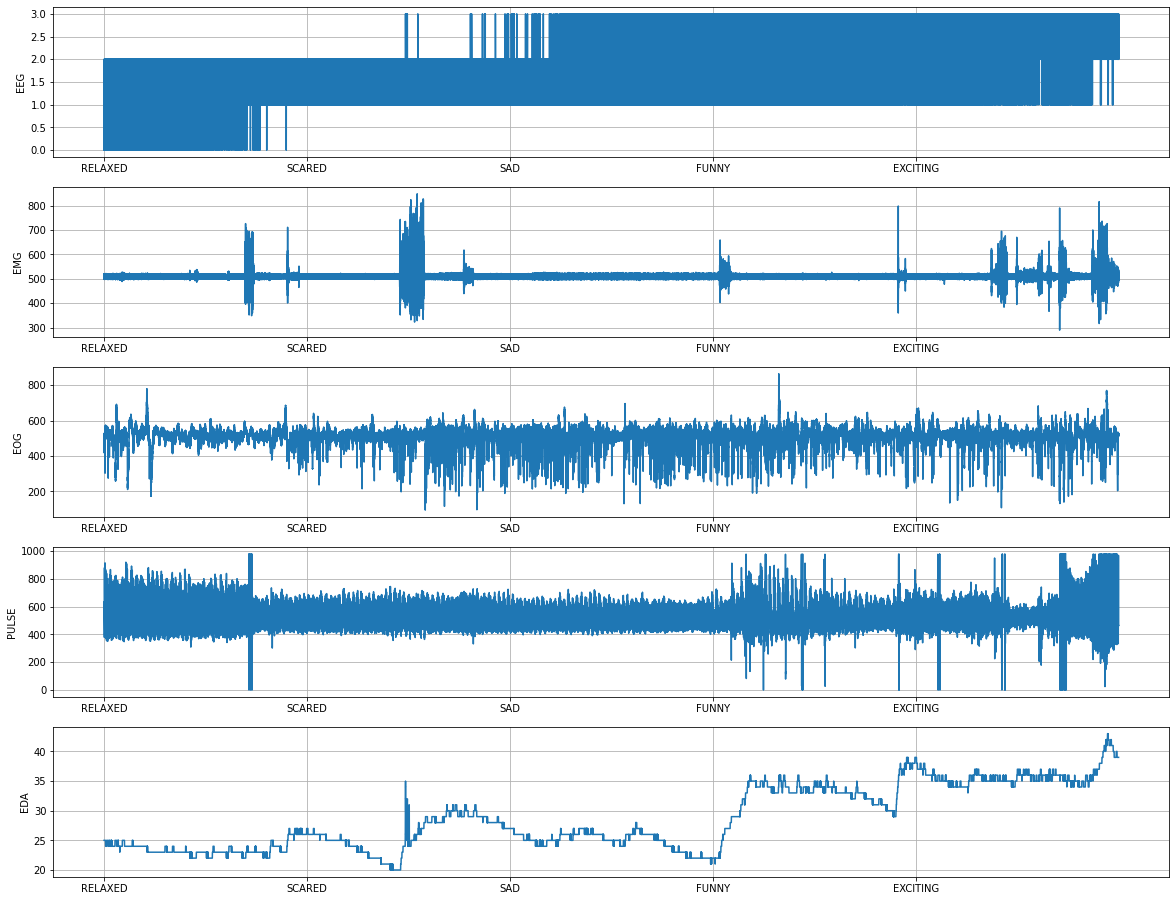

In [ ]:
plt.figure(figsize=(20,16))
sensors = [eeg_np, emg_np, eog_np, pul_np, eda_np]

for i, name in enumerate(["EEG", "EMG", "EOG", "PULSE", "EDA"]):
    plt.subplot(5, 1, i+1)
    plt.plot(np.array(range(len(sensors[i]))),sensors[i])
    plt.grid(True)
    plt.xticks([0, first, first*2, first*3, first*4], ["RELAXED", "SCARED", "SAD", "FUNNY", "EXCITING"])
    plt.ylabel(name)

plt.show()

In [ ]:
def moving_average(x,w):
  return np.convolve(x,np.ones(w),'valid') / w

### Pulse

**RELAXED**

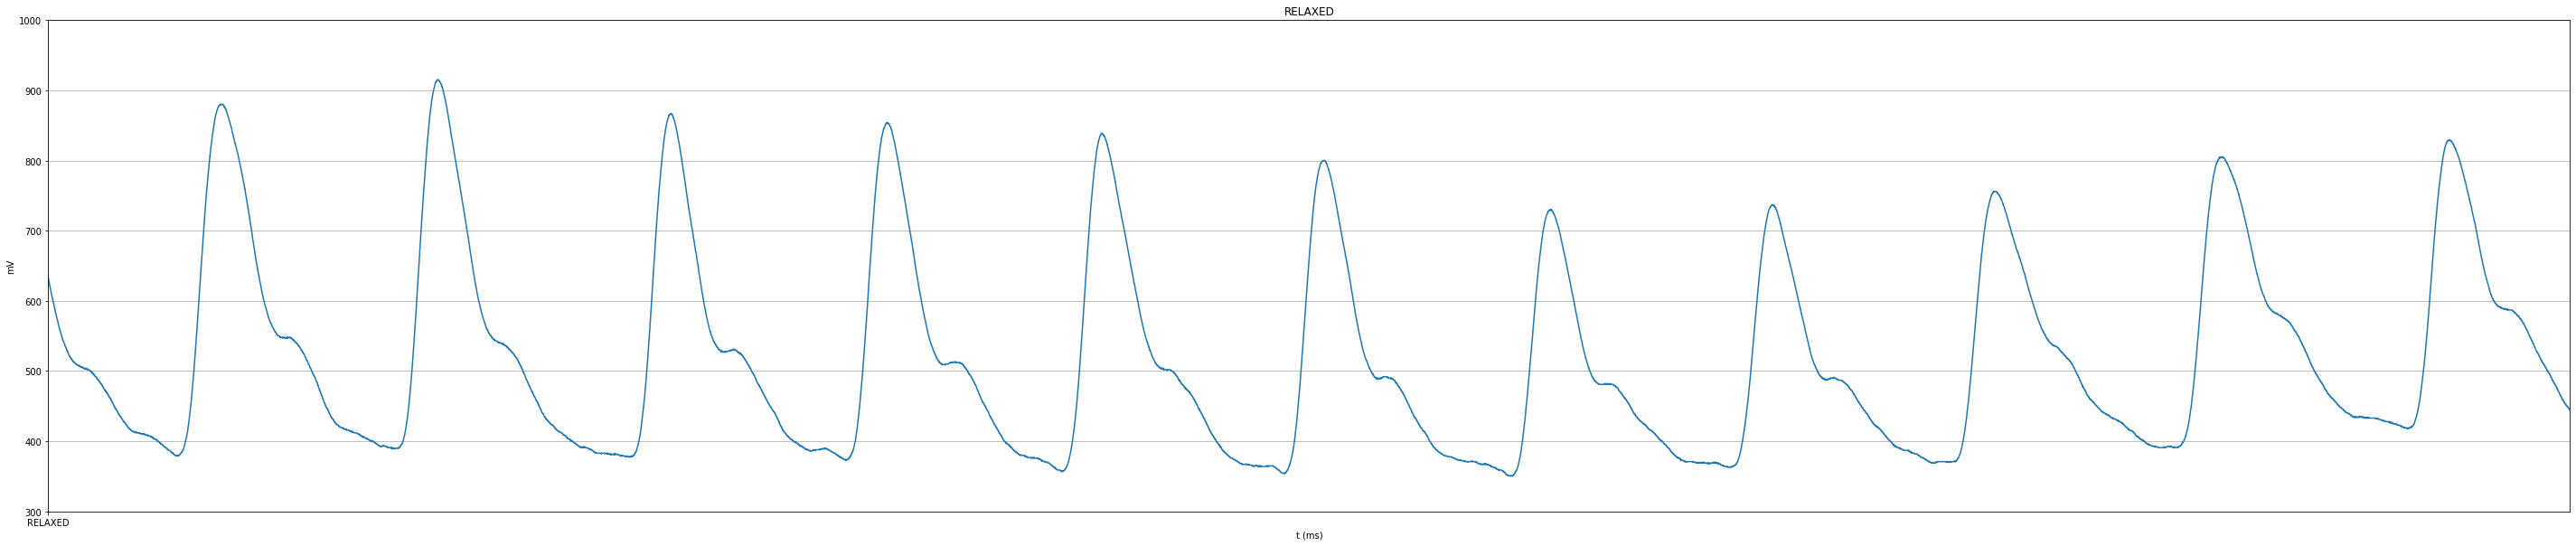

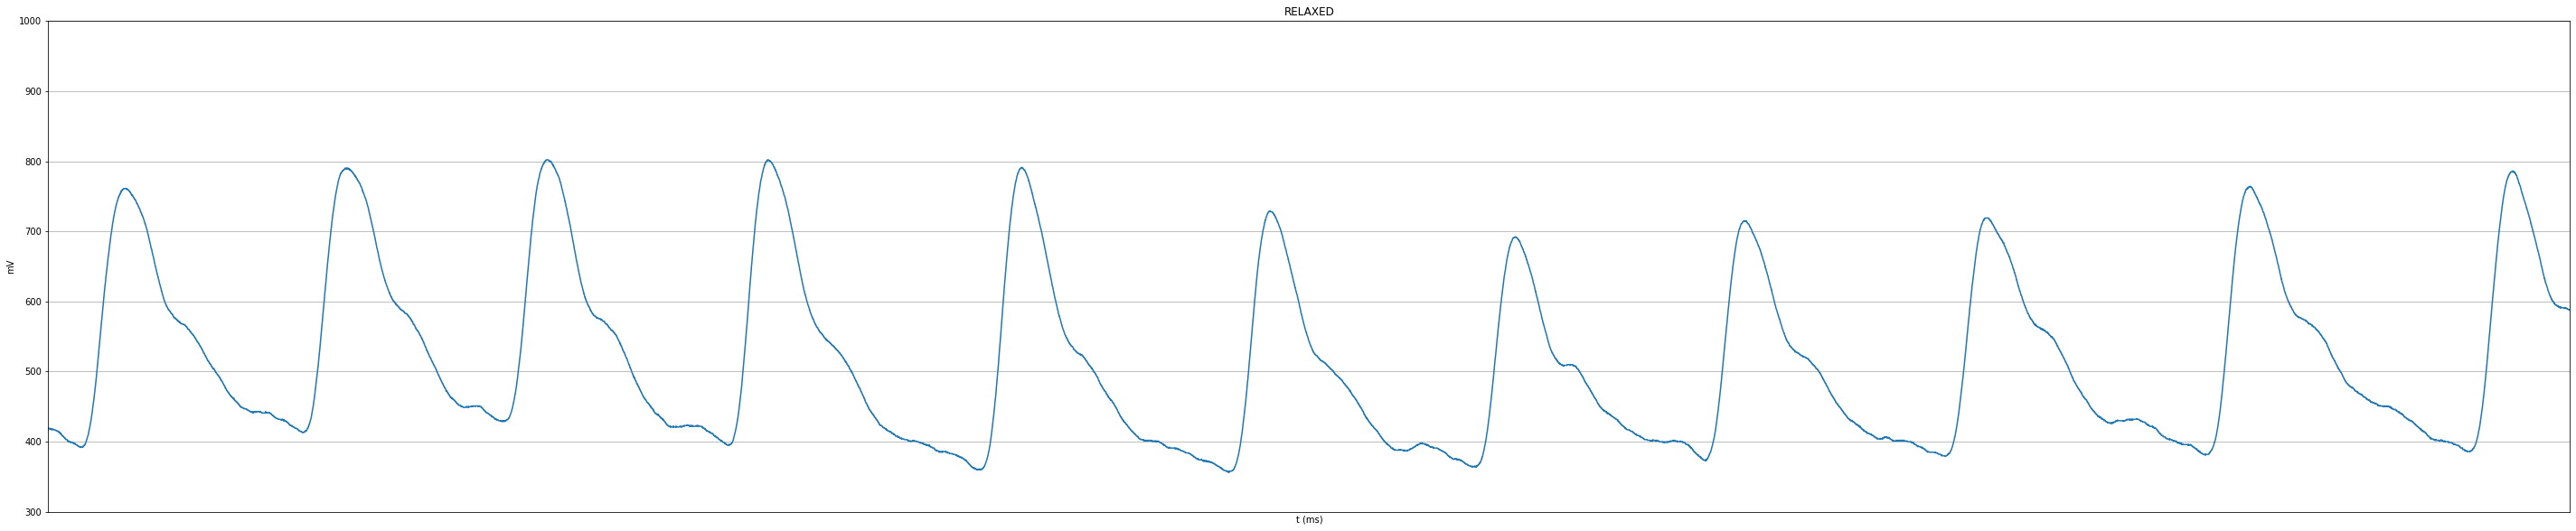

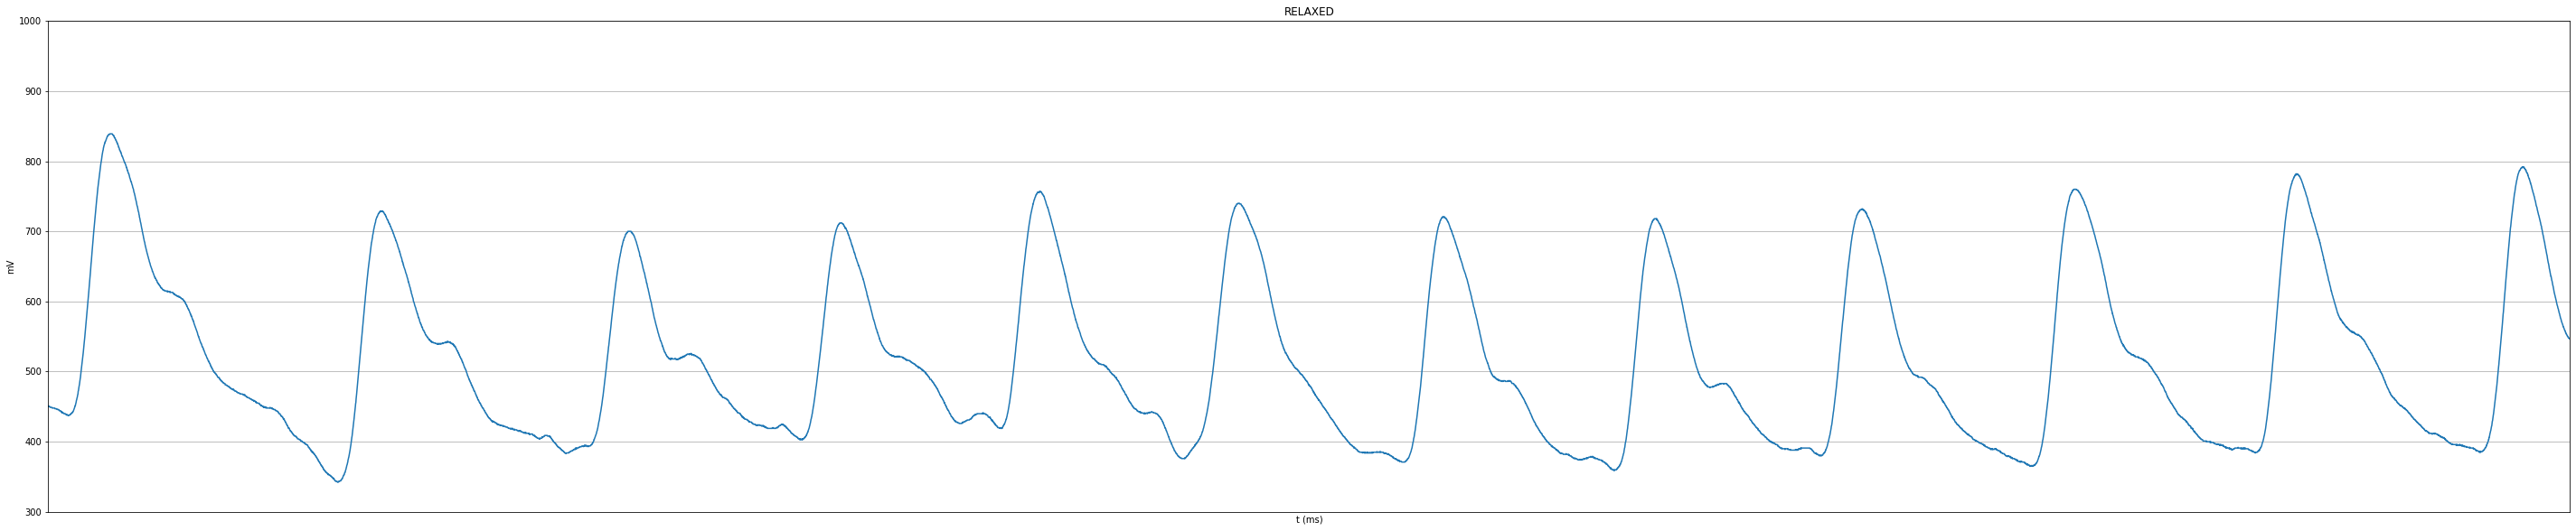

In [ ]:
for i in [0,100000,200000]:

  plt.figure(figsize=(50,10)) #setting plot window
  plt.plot(np.array(range(len(sensors[3]))),sensors[3])
  plt.ylim([300,1000])
  plt.ylabel('mV')
  plt.xlabel('t (ms)')
  plt.grid(True)
  plt.xticks([0, first, first*2, first*3, first*4], ["RELAXED", "SCARED", "SAD", "FUNNY", "EXCITING"])
  plt.xlim([i,i+10000]) #only show 10 seconds
  plt.title('RELAXED')
  plt.show()

Smoothed out:

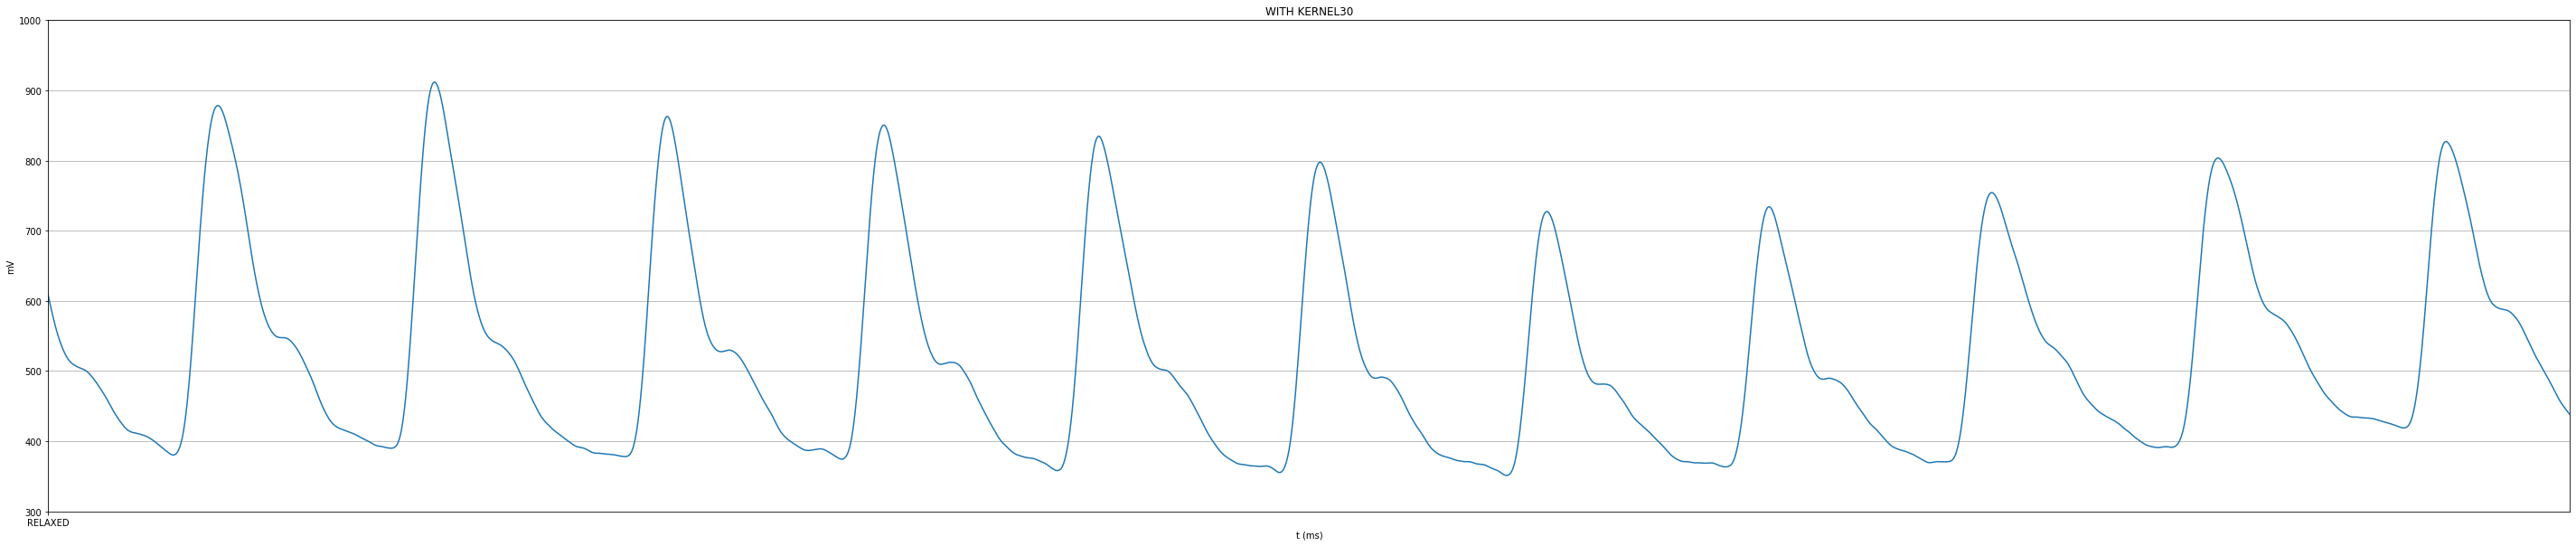

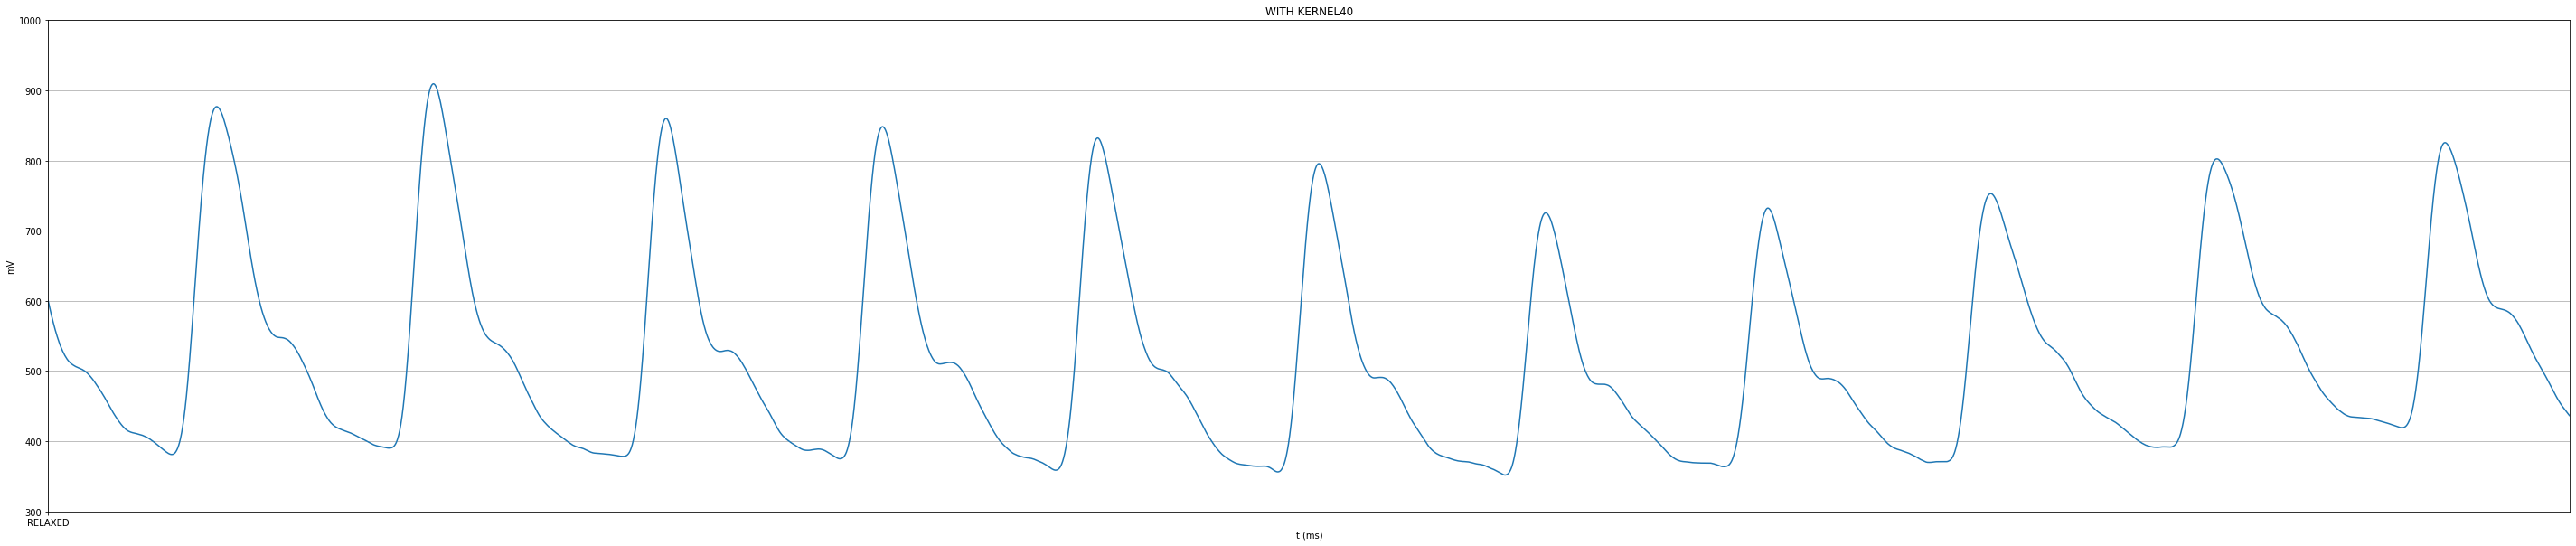

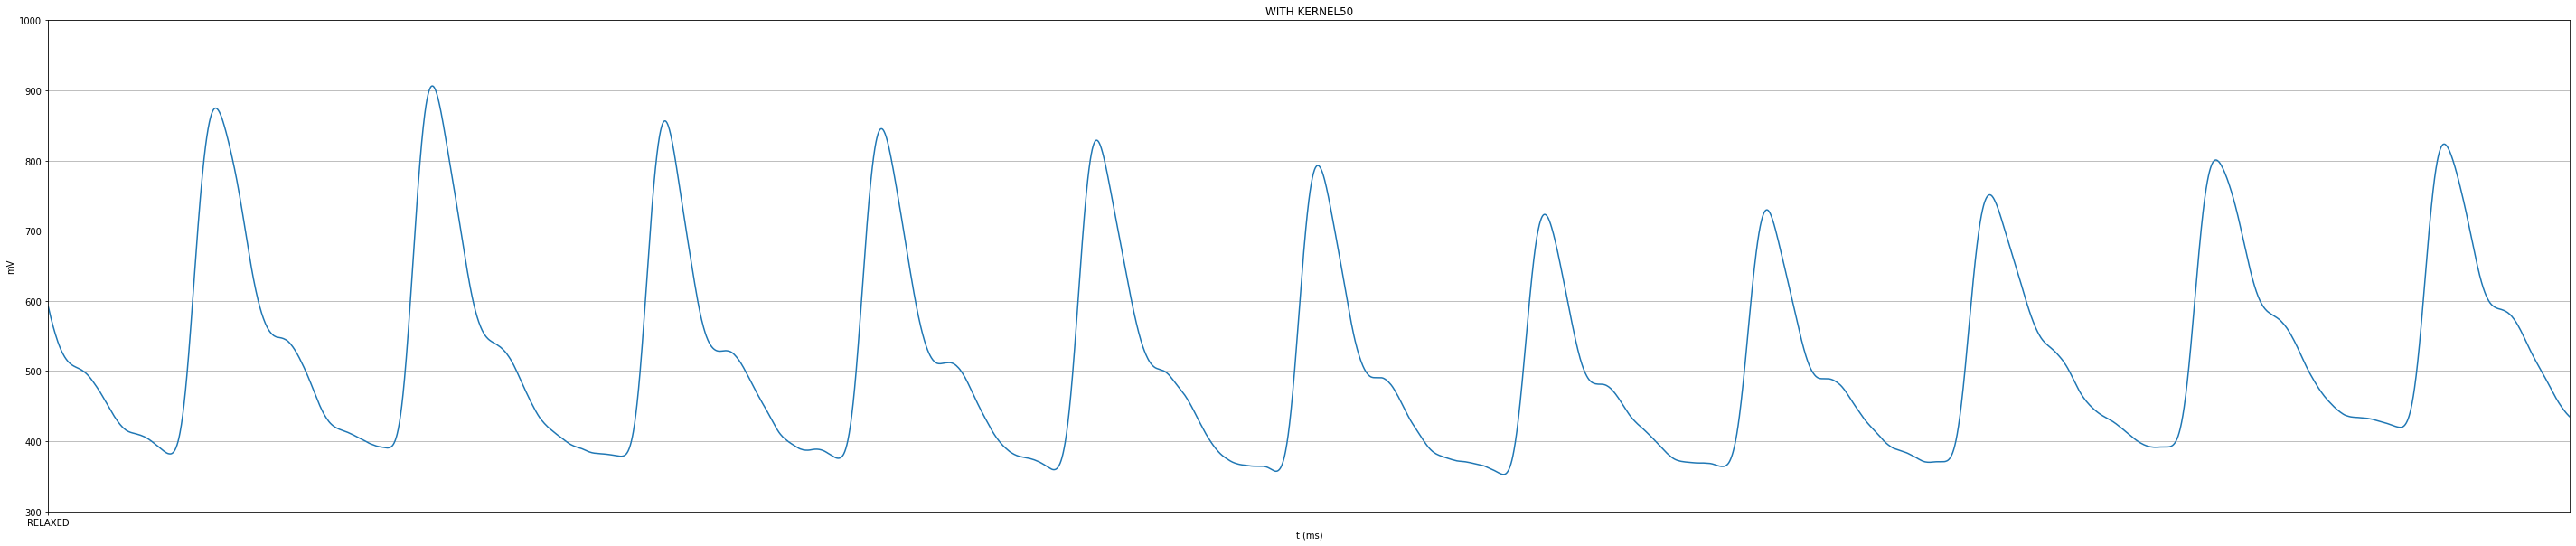

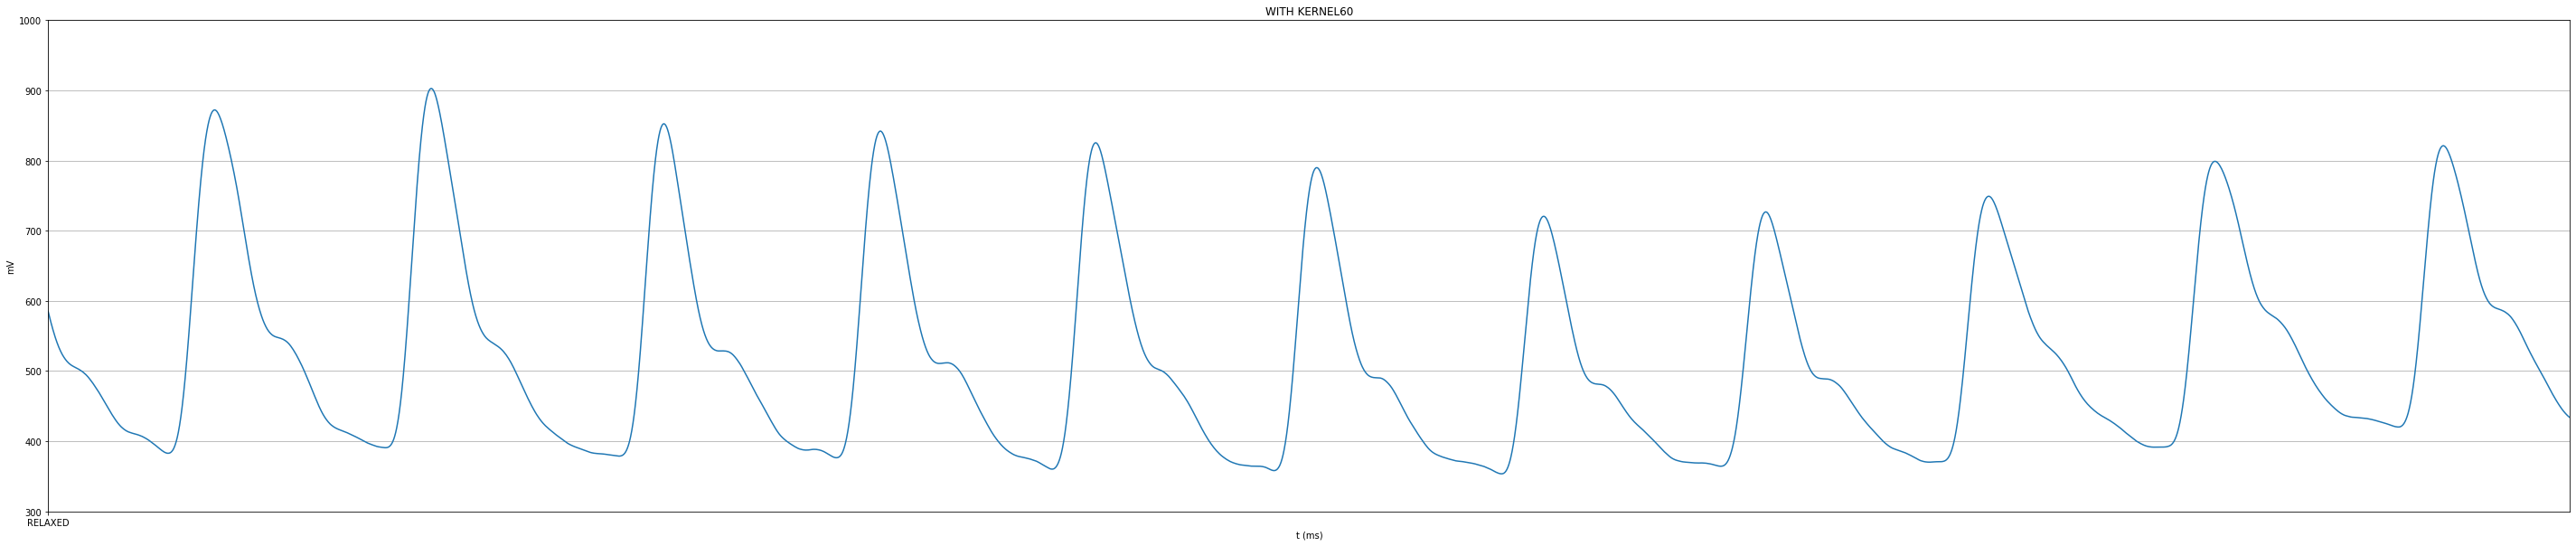

In [ ]:
for i in [30,40,50,60]: 
  plt.figure(figsize=(50,10)) #setting plot window
  plt.plot(np.array(range(len(moving_average(sensors[3],i)))),moving_average(sensors[3],i))
  plt.ylim([300,1000])
  plt.ylabel('mV')
  plt.xlabel('t (ms)')
  plt.grid(True)
  plt.xticks([0, first, first*2, first*3, first*4], ["RELAXED", "SCARED", "SAD", "FUNNY", "EXCITING"])
  plt.xlim([0,10000]) #only show 10 seconds
  title = 'WITH KERNEL' + str(i)
  plt.title(title)
  plt.show()

In [ ]:
# FINDING THE HRV

ecg_cleaned = nk.ecg_clean(moving_average(sensors[3],40), sampling_rate=1000)
peaks, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=1000, correct_artifacts=True)

# Compute HRV indices
hrv_indices = nk.hrv(peaks, sampling_rate=1000, show=True)
hrv_indices

IndexError: ignored

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/neurokit2/hrv/hrv_nonlinear.py:491: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `windows` argument in `nk.fractal_dfa()` for more information.
  category=NeuroKitWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This im

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_HTI,HRV_TINN,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_DFA_alpha1,HRV_DFA_alpha1_ExpRange,HRV_DFA_alpha1_ExpMean,HRV_DFA_alpha1_DimRange,HRV_DFA_alpha1_DimMean,HRV_ApEn,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSE,HRV_CMSE,HRV_RCMSE,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,13808.691667,34229.4742,12528.066862,18646.602512,31207.907904,22081.231999,28484.90804,28748.724527,32004.032044,32139.355418,2.478835,2.317673,2301.0,2322.4929,1.009341,5797.75,76.666667,85.0,30.0,468.75,0.000485,0.000554,8.143797e-07,6.102427e-09,1.174547e-11,133.451782,0.000783,0.000006,-18.914579,22725.956159,42942.009735,0.529224,3.065875e+09,1.889558,10.193525,324565.652984,0.608333,0.612069,0.873239,0.1875,49.969946,50.491971,46.966377,48.275862,0.438505,0.561495,15049.0591,17029.237514,0.76642,0.23358,37593.770783,20753.905618,0.694673,0.305327,28633.597237,18983.144217,0.881136,3.734426,2.331177,1.597672,0.544189,0.454829,0.295546,6.856891,0.496547,0.0,0.374975,0.367484,0.266334,1.816031,1.645527,1.036034


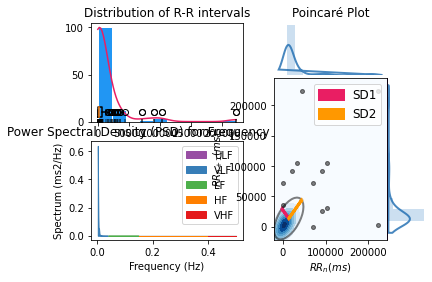

In [ ]:
# trying without the smoothed to see if the error is bcs sampling rate doesnt match -> it does so I should find out hoe to compute the new sampling rate
ecg_cleaned = nk.ecg_clean(sensors[3], sampling_rate=1000)
peaks, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=1000, correct_artifacts=True)

# Compute HRV indices
# TODO: MAKE SENSE OF ALL THESE VARIABLES
# TODO: Seperate for each 5 minutes and compare those 
hrv_indices = nk.hrv(peaks, sampling_rate=1000, show=True)
hrv_indices

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/neurokit2/hrv/hrv_nonlinear.py:491: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `windows` argument in `nk.fractal_dfa()` for more information.
  category=NeuroKitWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This im

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_HTI,HRV_TINN,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_DFA_alpha1,HRV_DFA_alpha1_ExpRange,HRV_DFA_alpha1_ExpMean,HRV_DFA_alpha1_DimRange,HRV_DFA_alpha1_DimMean,HRV_ApEn,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSE,HRV_CMSE,HRV_RCMSE,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,13808.691667,34229.4742,12528.066862,18646.602512,31207.907904,22081.231999,28484.90804,28748.724527,32004.032044,32139.355418,2.478835,2.317673,2301.0,2322.4929,1.009341,5797.75,76.666667,85.0,30.0,468.75,0.000485,0.000554,8.143797e-07,6.102427e-09,1.174547e-11,133.451782,0.000783,0.000006,-18.914579,22725.956159,42942.009735,0.529224,3.065875e+09,1.889558,10.193525,324565.652984,0.608333,0.612069,0.873239,0.1875,49.969946,50.491971,46.966377,48.275862,0.438505,0.561495,15049.0591,17029.237514,0.76642,0.23358,37593.770783,20753.905618,0.694673,0.305327,28633.597237,18983.144217,0.881136,3.734426,2.331177,1.597672,0.544189,0.454829,0.295546,6.856891,0.496547,0.0,0.374975,0.367484,0.266334,1.816031,1.645527,1.036034


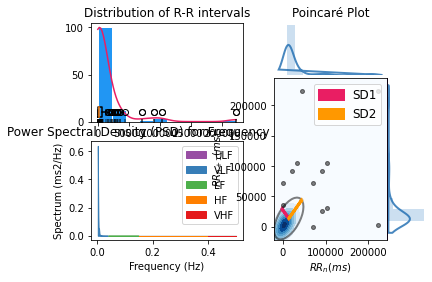

In [ ]:
# Compute HRV from processed signals
signals, info = nk.bio_process(sensors[3], sampling_rate=1000)
hrv = nk.hrv(signals, sampling_rate=1000, show=True)
#TODO : Find out how to deal with cleaned data
#TODO: understand each variable in the table 
#TODO: Understand the graphs 
# TODO: plot it for each 5 minutes and compare 
hrv 

**SCARED**

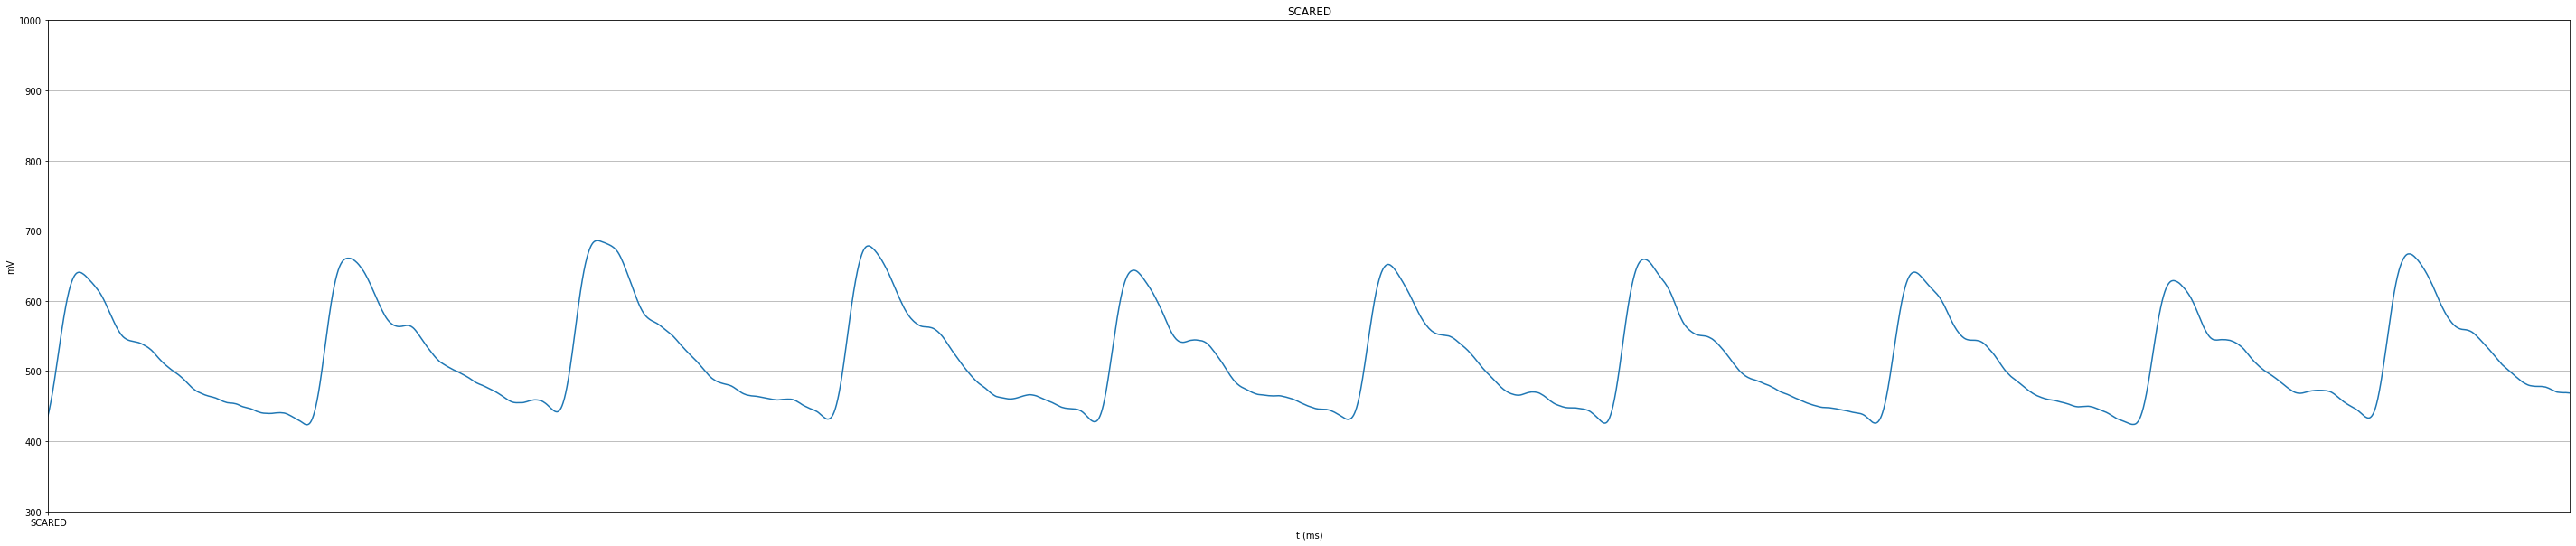

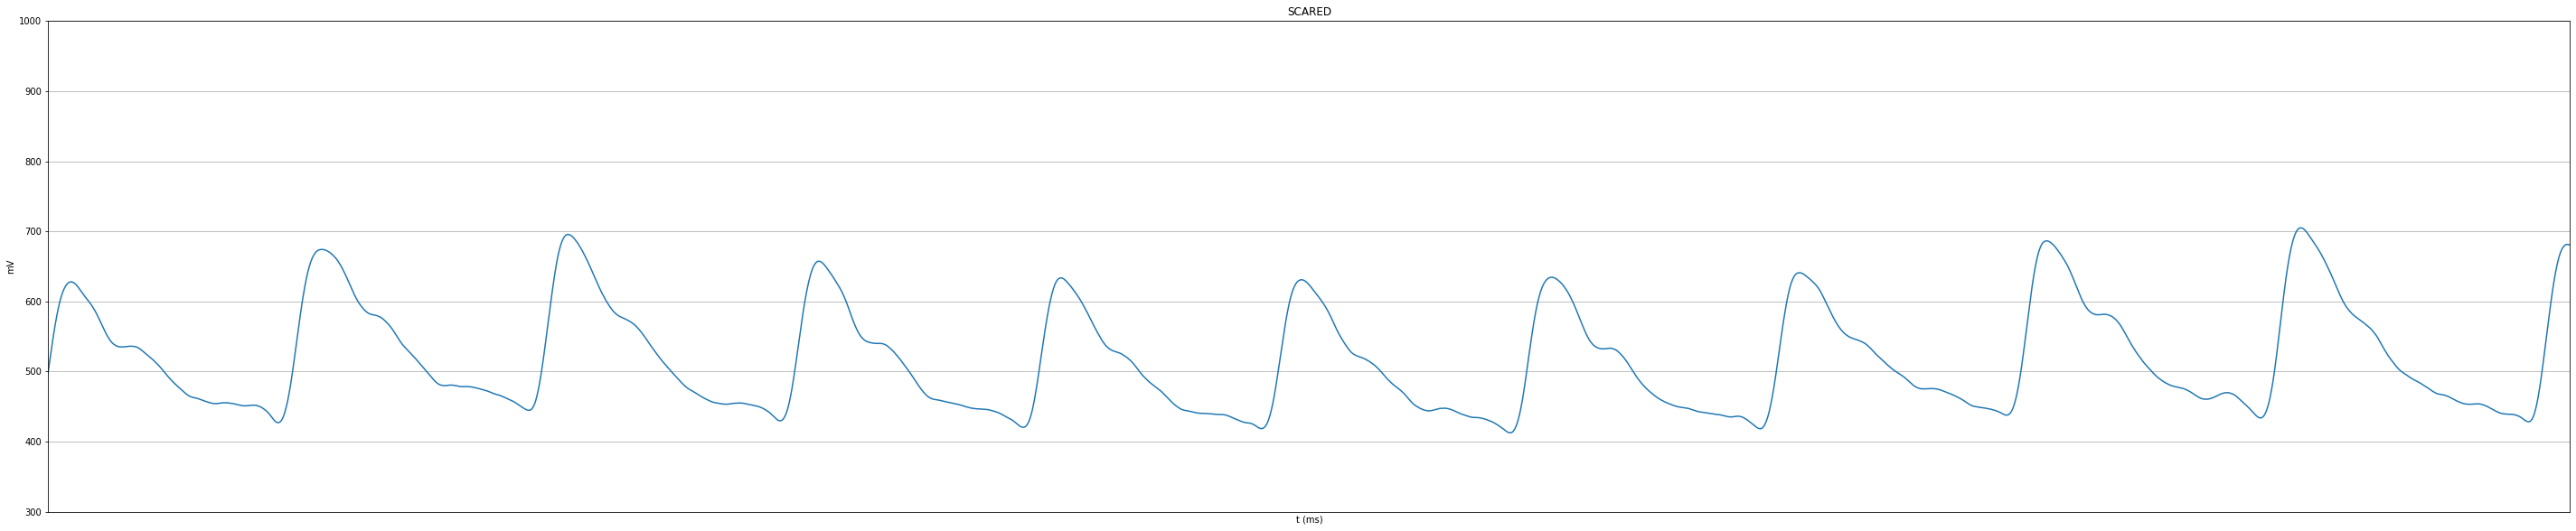

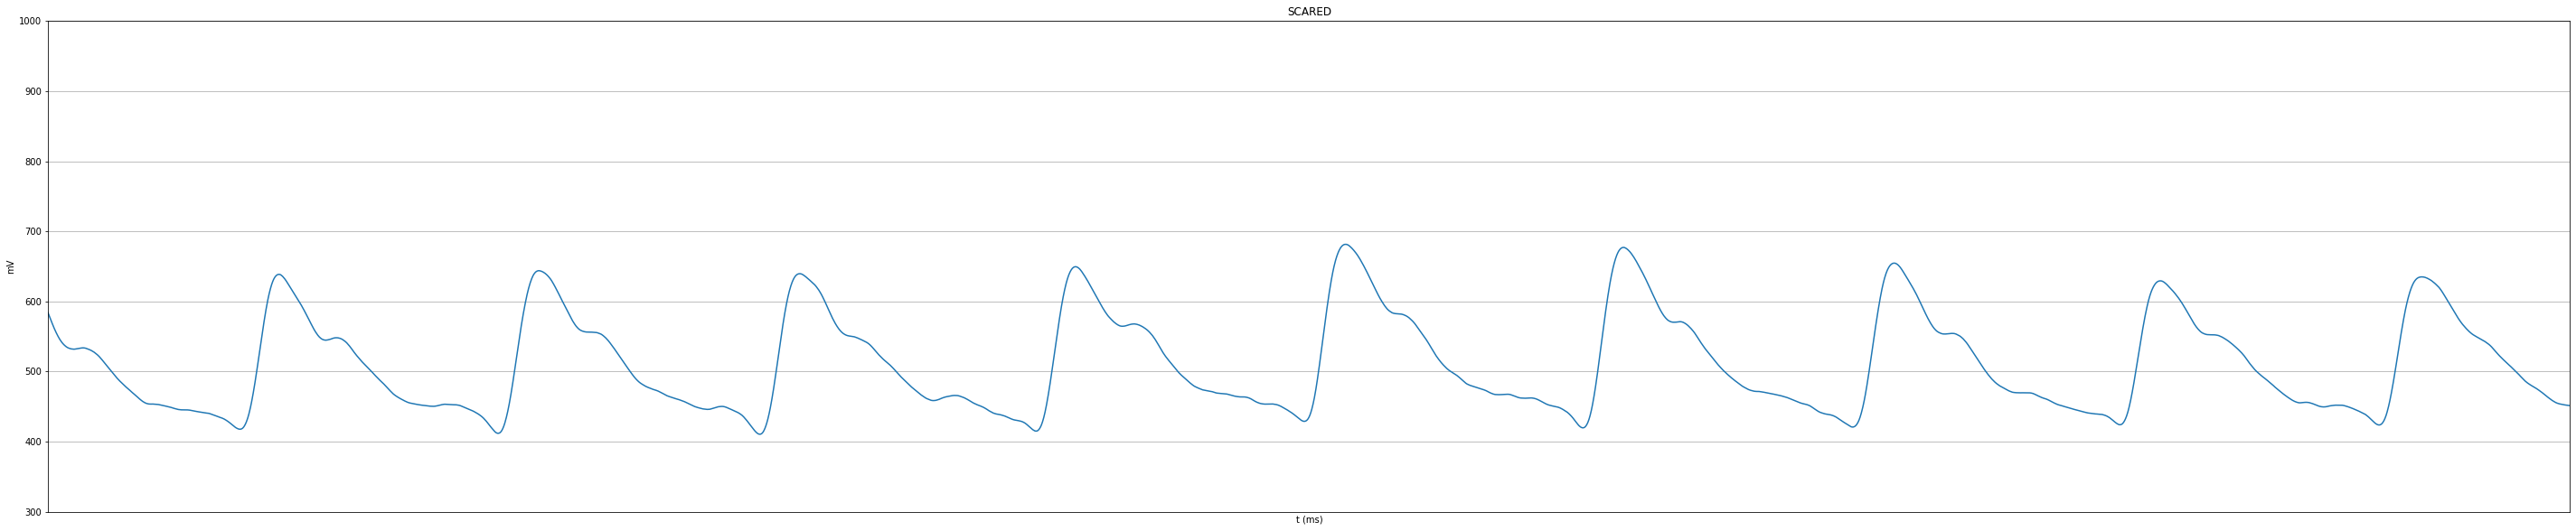

In [ ]:
for i in [first, first + 100000, first + 200000]:
  plt.figure(figsize=(50,10)) #setting plot window
  plt.plot(np.array(range(len(moving_average(sensors[3],40)))),moving_average(sensors[3],40))
  #plt.plot(np.array(range(len(sensors[3]))),sensors[3]) # not smooth
  plt.ylim([300,1000])
  plt.ylabel('mV')
  plt.xlabel('t (ms)')
  plt.grid(True)
  plt.xticks([0, first, first*2, first*3, first*4], ["RELAXED", "SCARED", "SAD", "FUNNY", "EXCITING"])
  plt.xlim([i,i + 10000]) #only show 10 seconds
  plt.title('SCARED')
  plt.show()

**SAD**

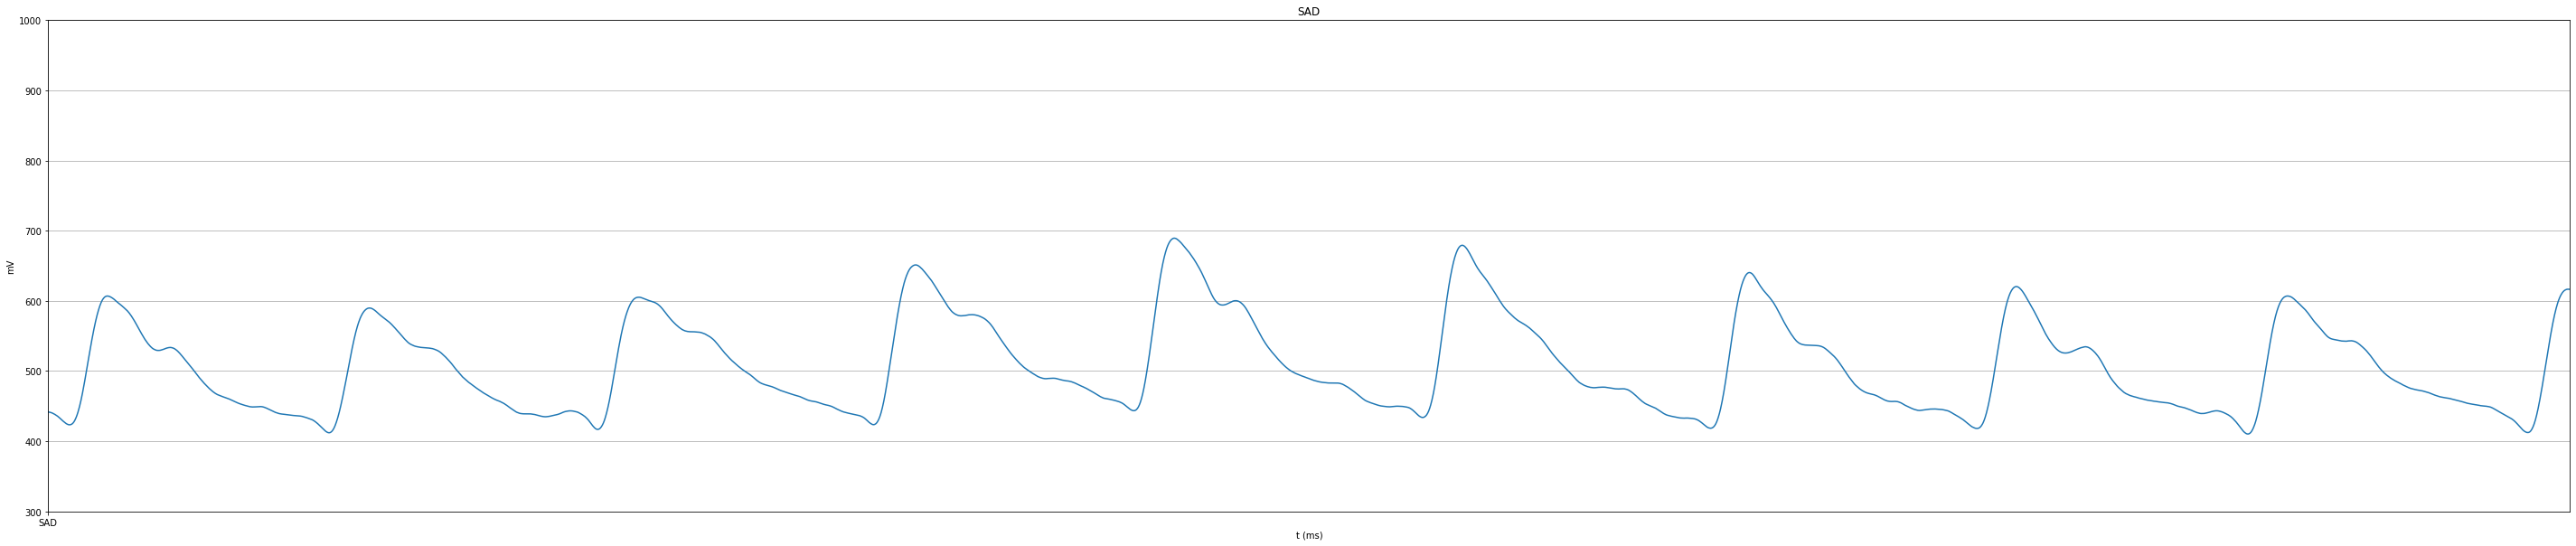

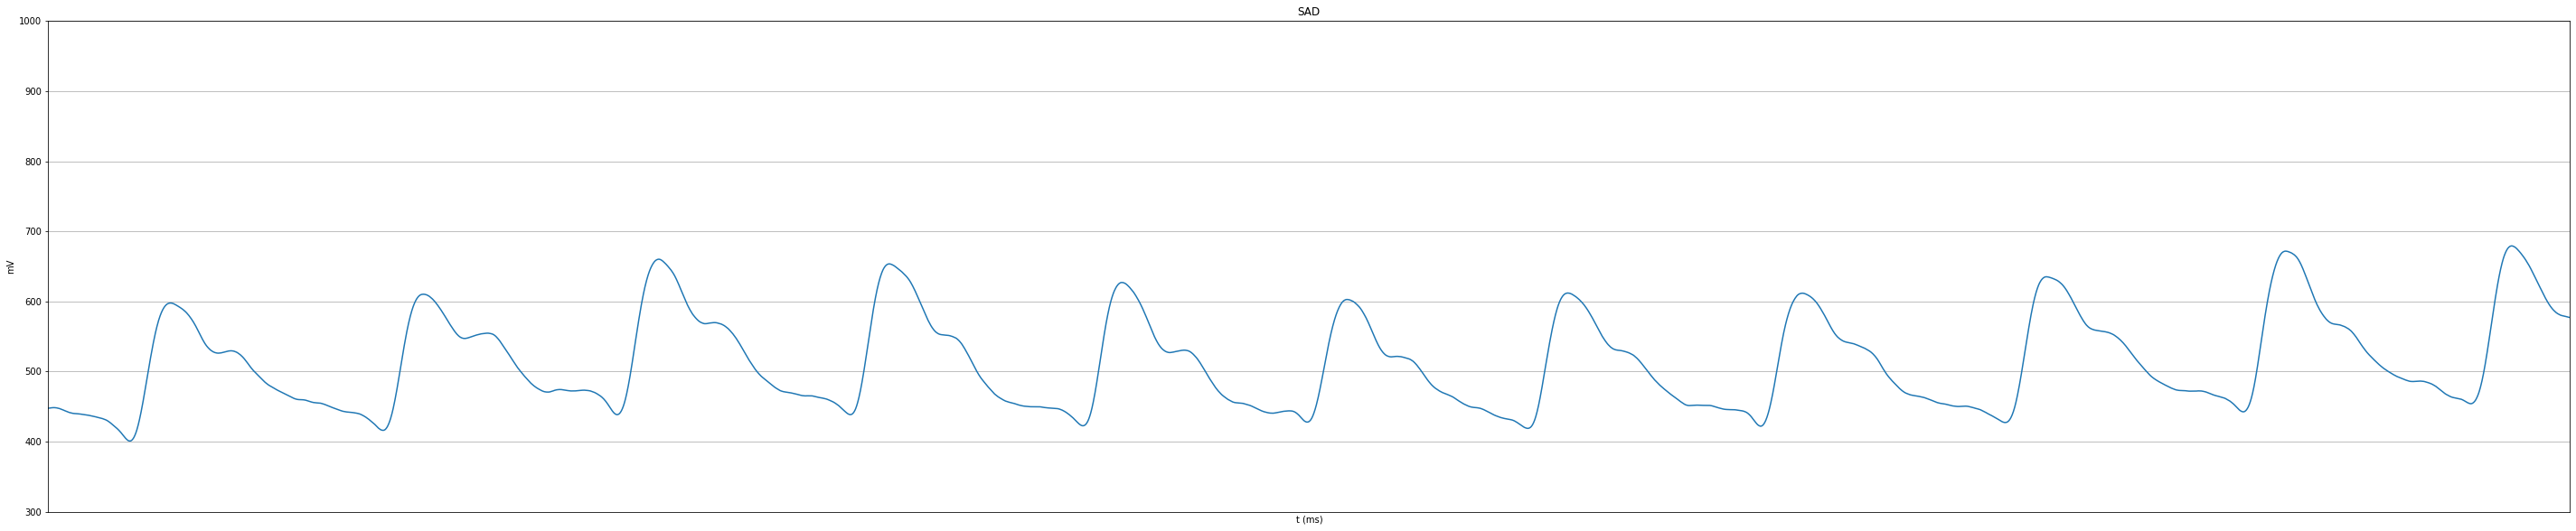

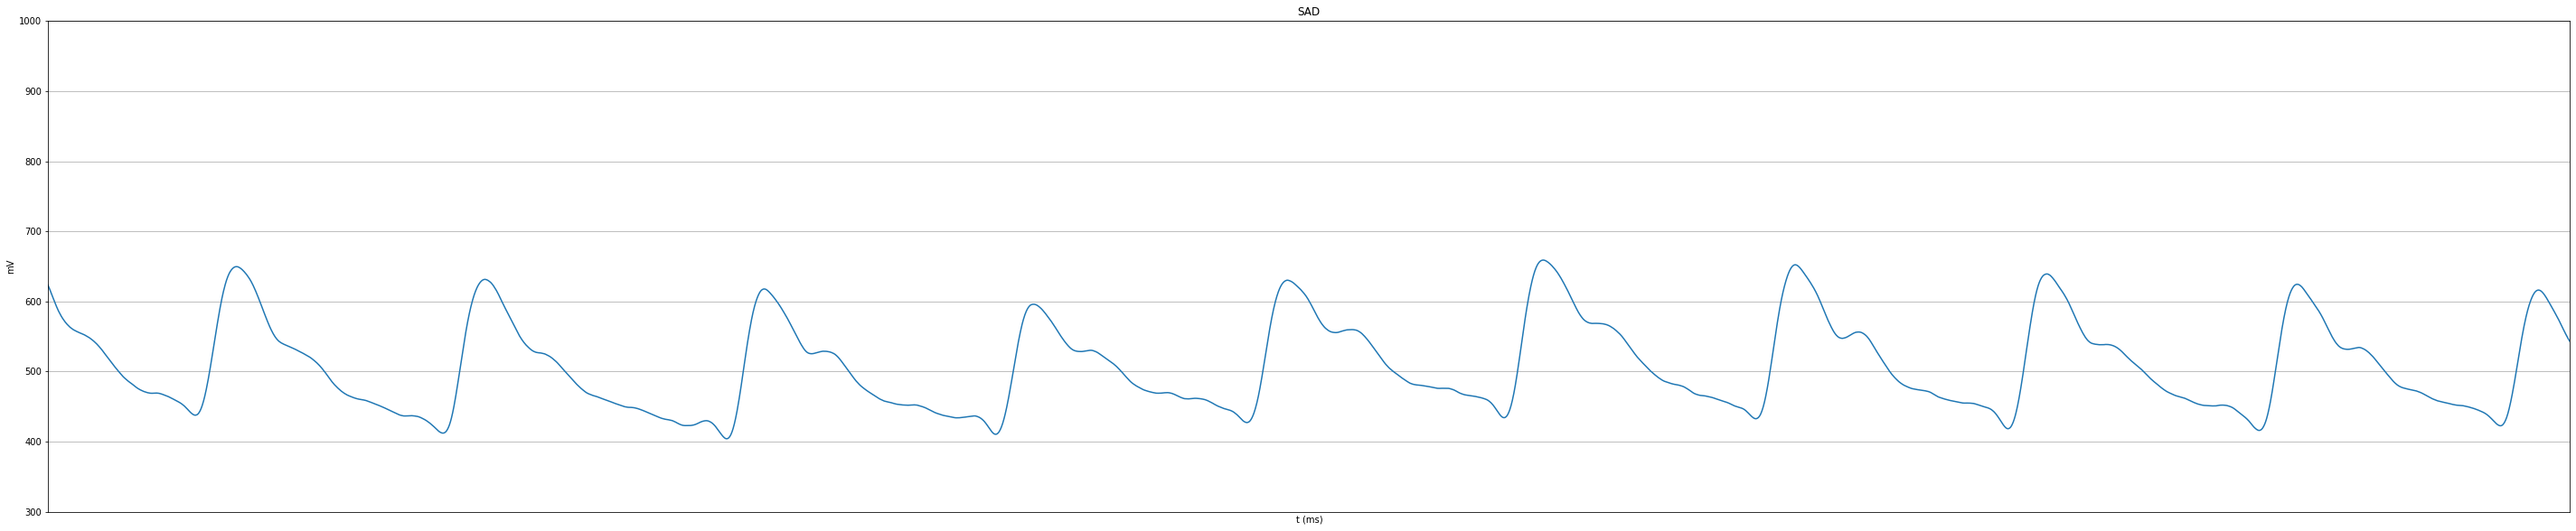

In [ ]:
for i in [2*first, 2*first + 100000, 2*first + 200000]:
  plt.figure(figsize=(50,10)) #setting plot window
  #plt.plot(np.array(range(len(sensors[3]))),sensors[3])
  plt.plot(np.array(range(len(moving_average(sensors[3],40)))),moving_average(sensors[3],40))
  plt.ylim([300,1000])
  plt.ylabel('mV')
  plt.xlabel('t (ms)')
  plt.grid(True)
  plt.xticks([0, first, first*2, first*3, first*4], ["RELAXED", "SCARED", "SAD", "FUNNY", "EXCITING"])
  plt.xlim([i,i + 10000]) #only show 10 seconds
  plt.title('SAD')
  plt.show()

**FUNNY**

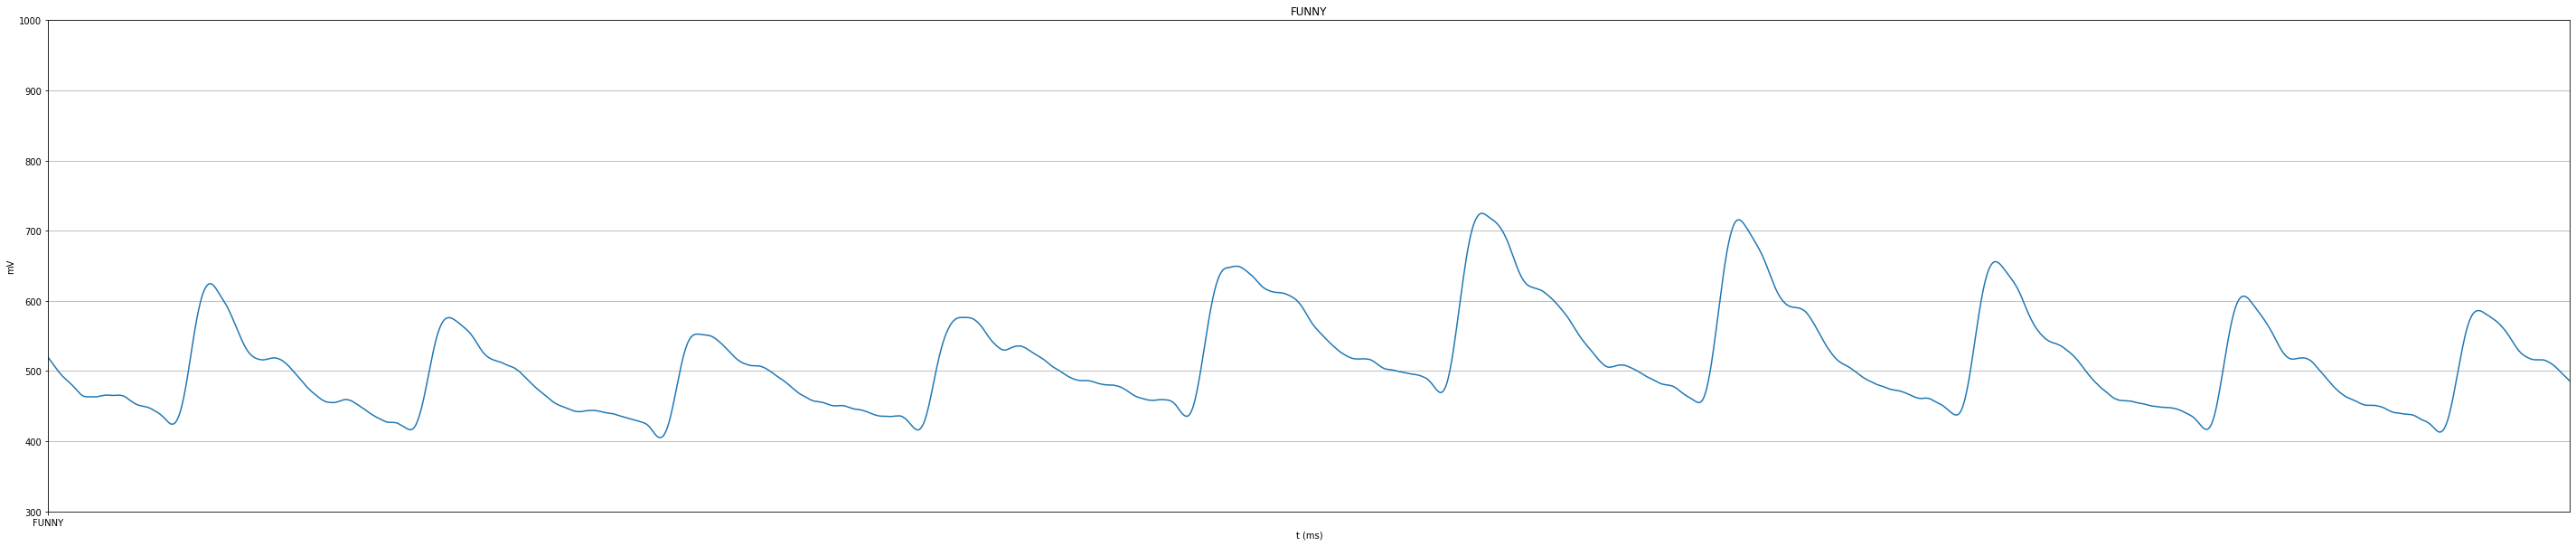

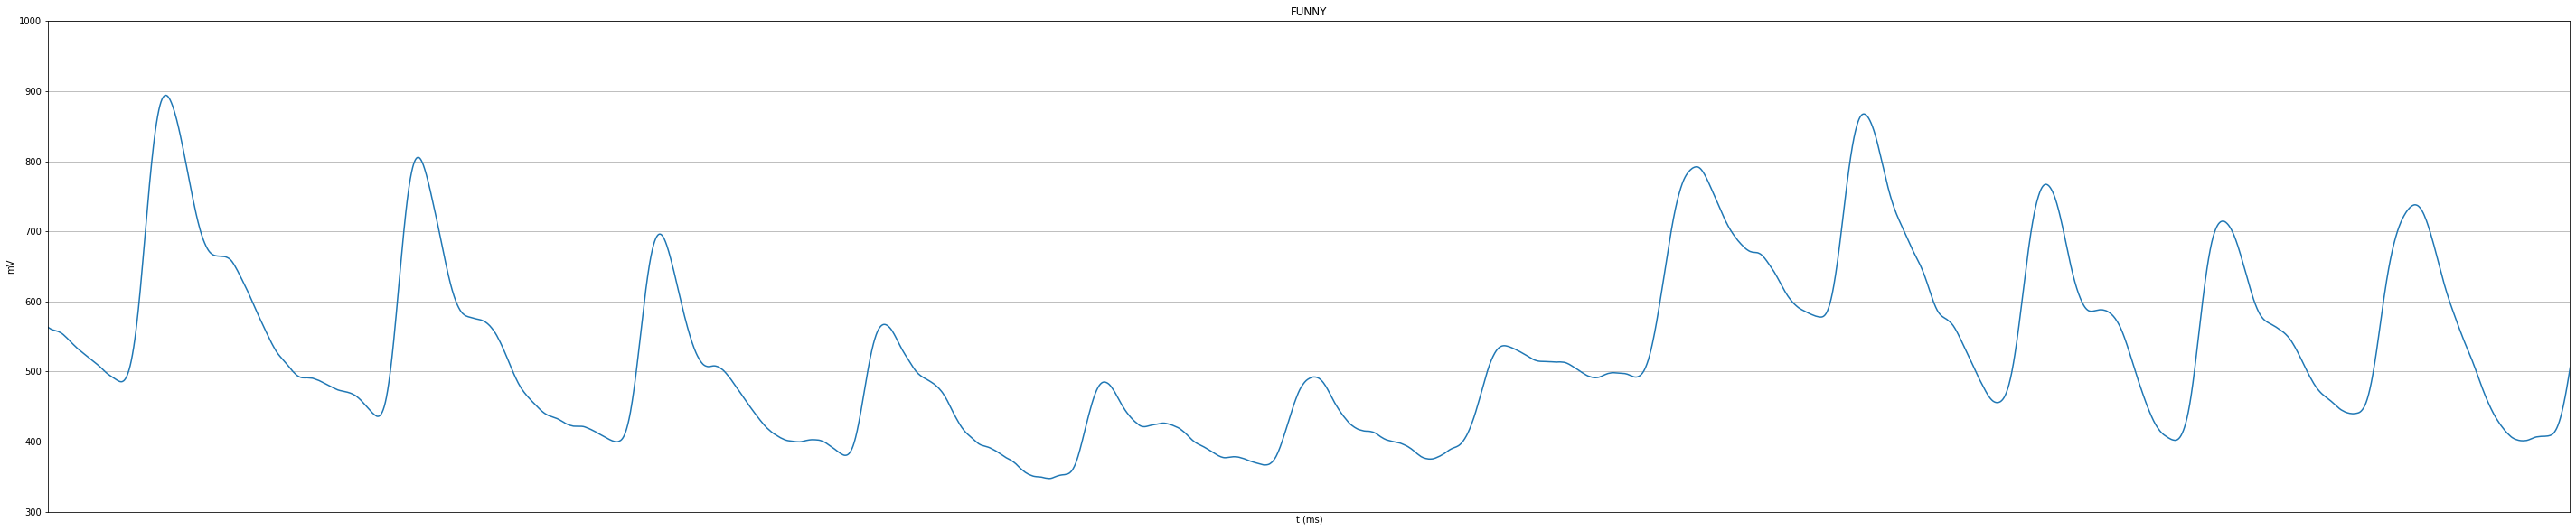

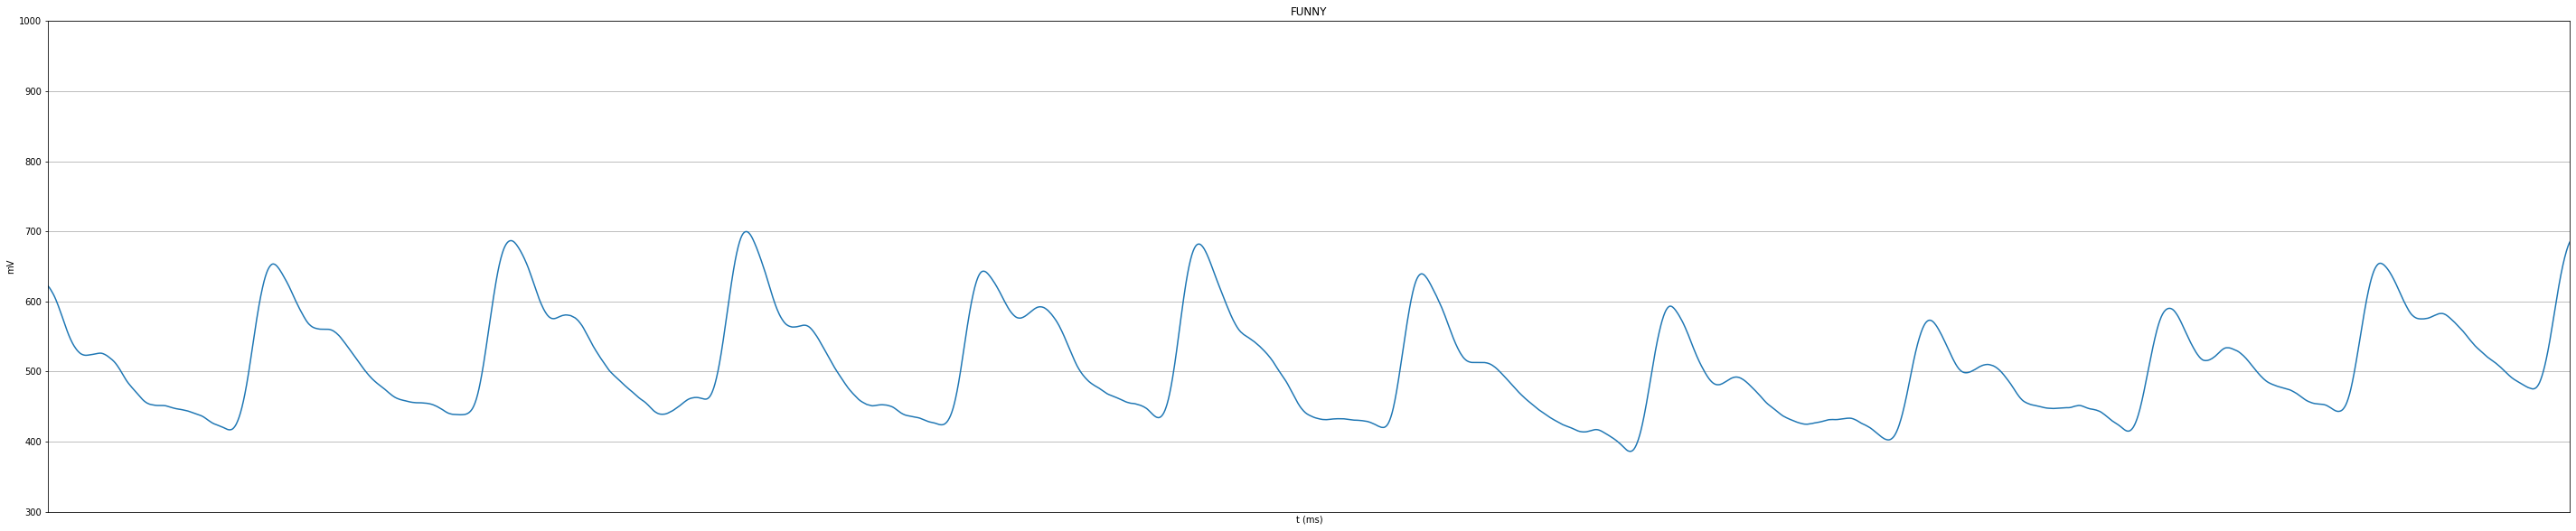

In [ ]:
for i in [3*first, 3*first + 100000, 3*first + 200000]:
  plt.figure(figsize=(50,10)) #setting plot window
  #plt.plot(np.array(range(len(sensors[3]))),sensors[3])
  plt.plot(np.array(range(len(moving_average(sensors[3],40)))),moving_average(sensors[3],40))
  plt.ylim([300,1000])
  plt.ylabel('mV')
  plt.xlabel('t (ms)')
  plt.grid(True)
  plt.xticks([0, first, first*2, first*3, first*4], ["RELAXED", "SCARED", "SAD", "FUNNY", "EXCITING"])
  plt.xlim([i,i + 10000]) #only show 10 seconds
  plt.title('FUNNY')
  plt.show()

**EXCITING**

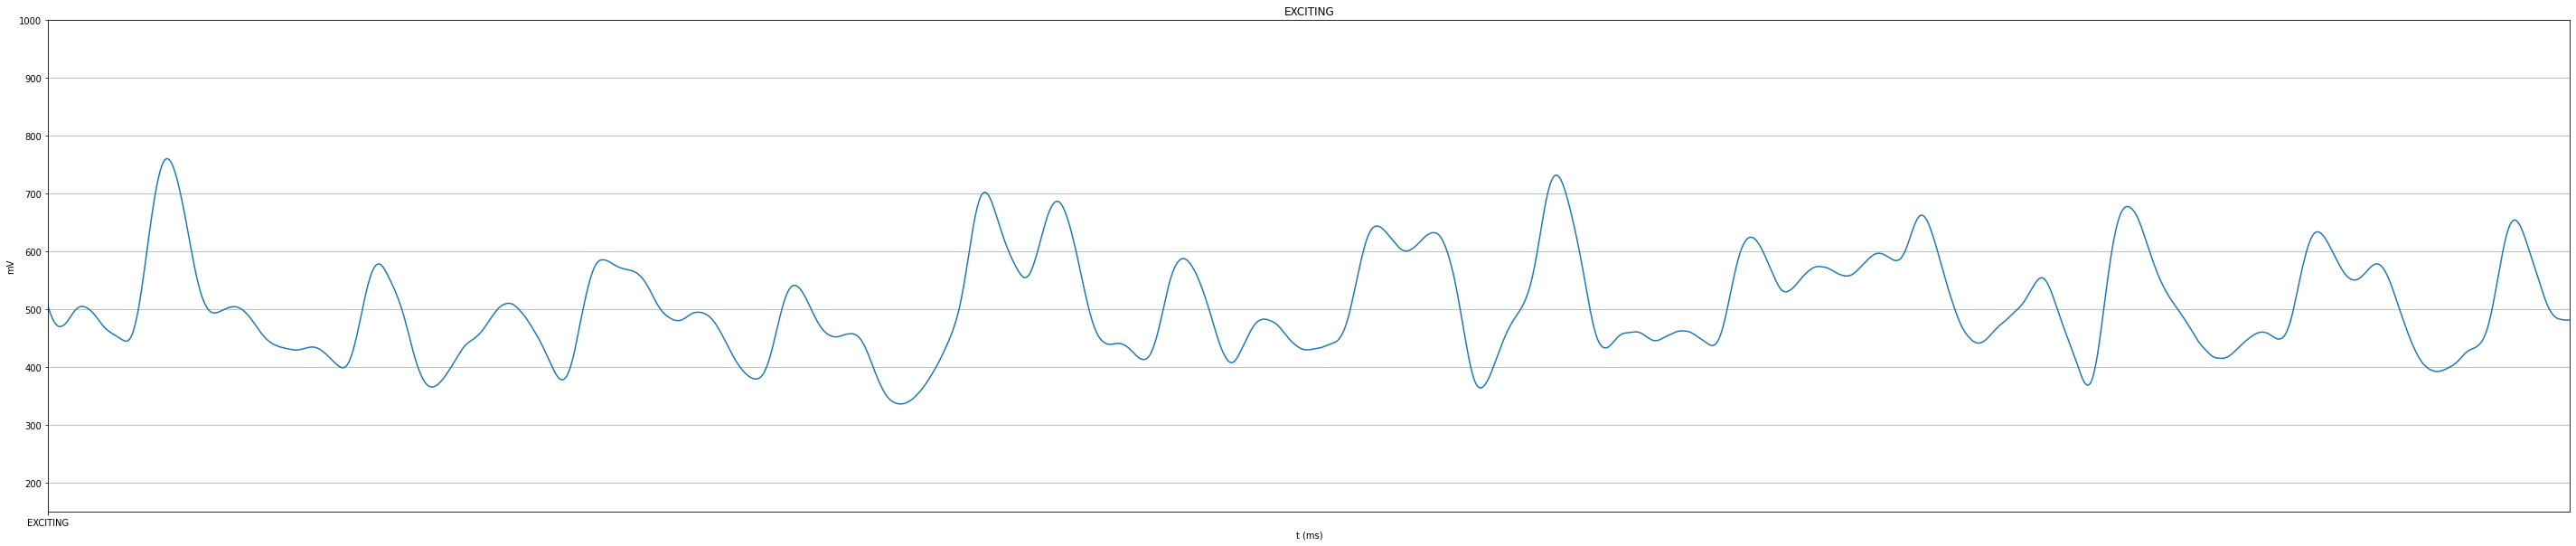

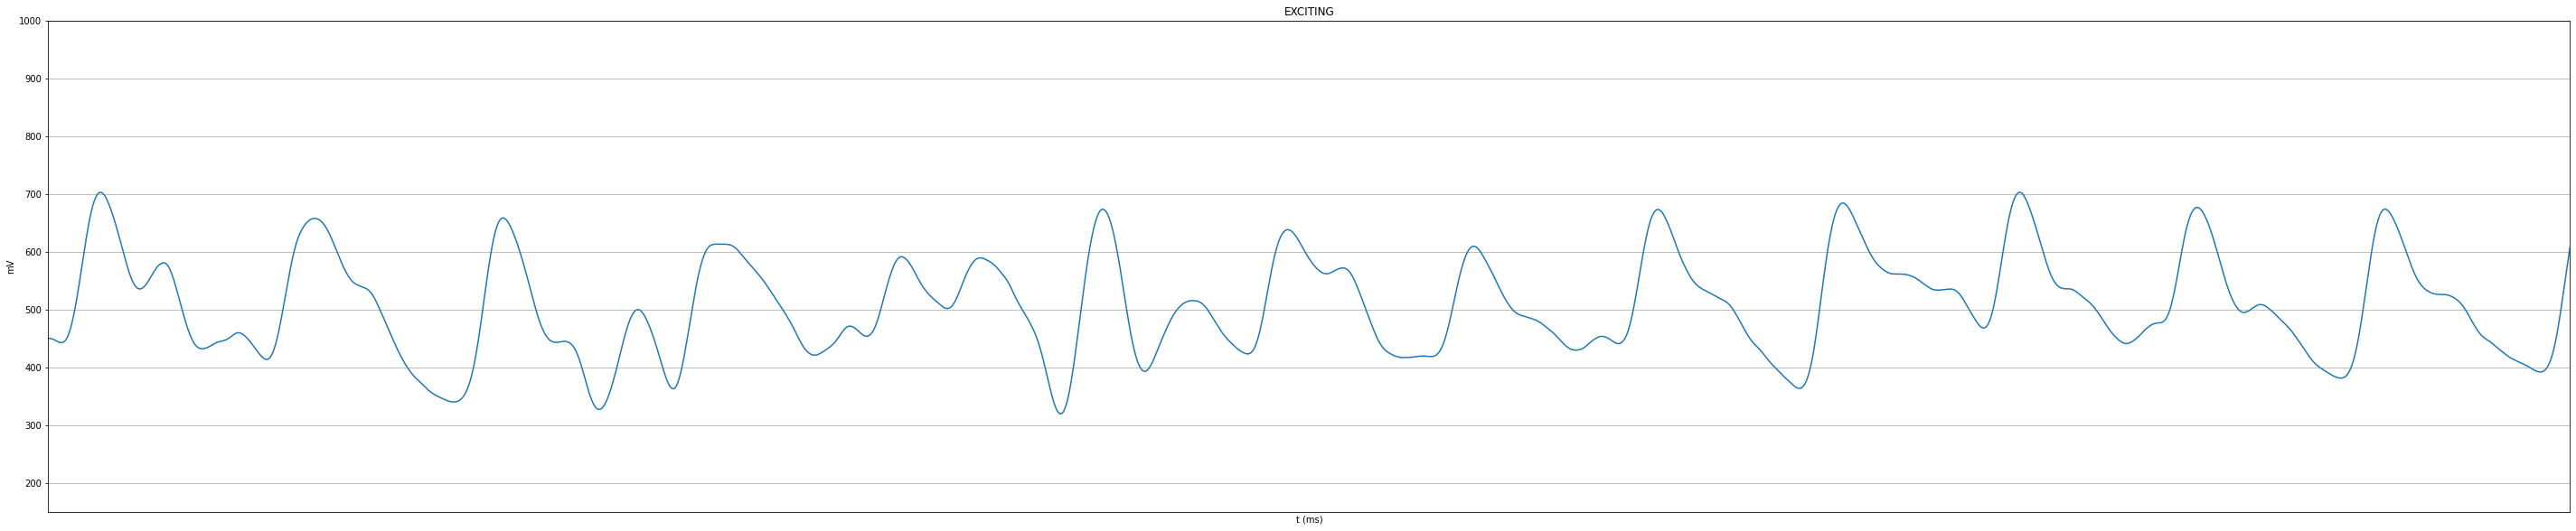

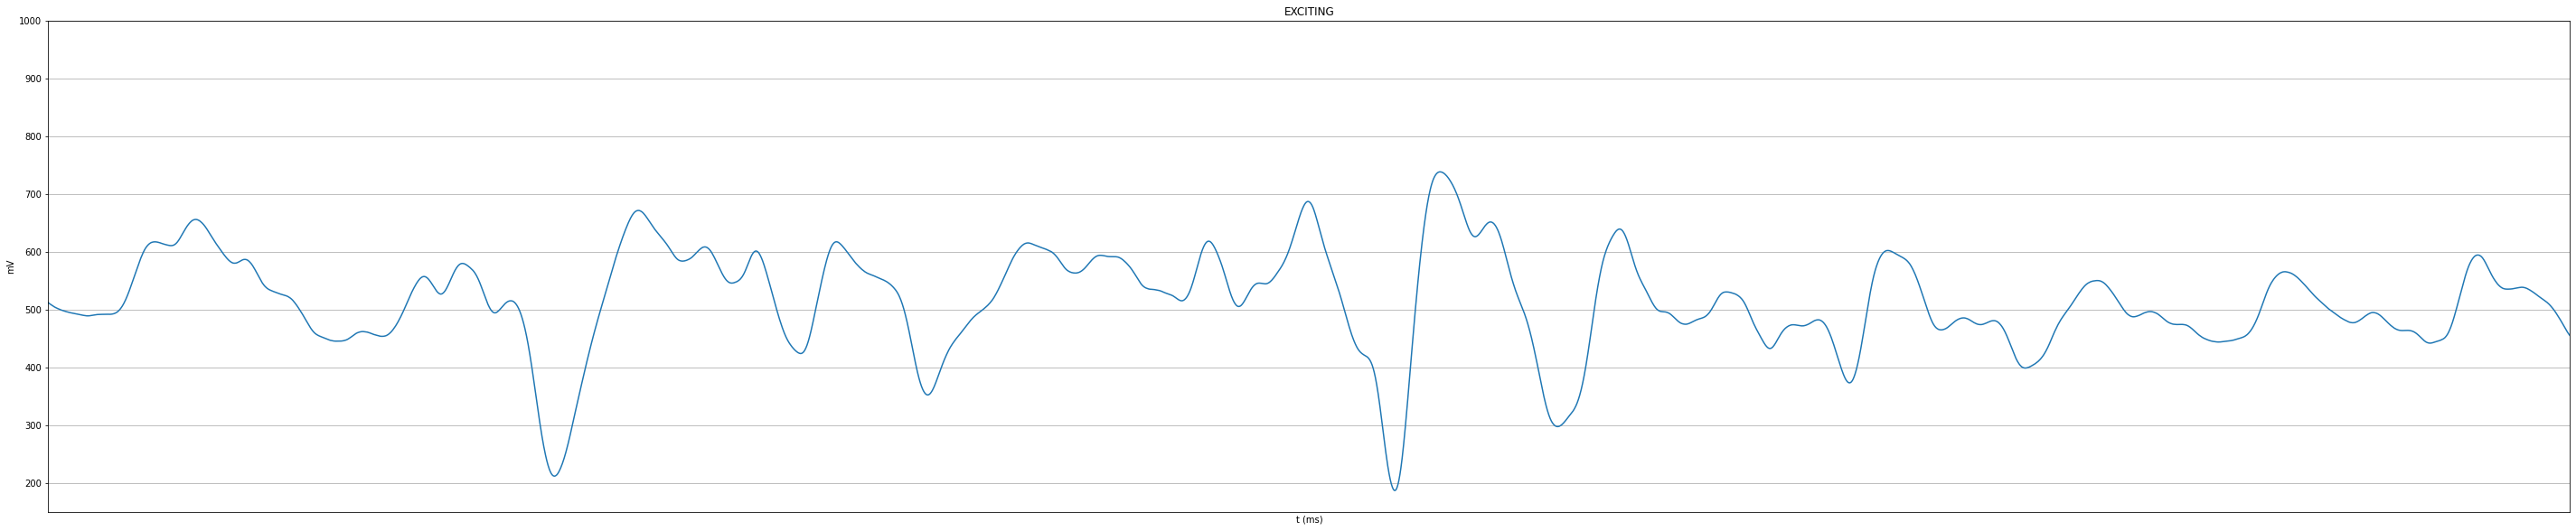

In [ ]:
for i in [4*first, 4*first + 100000, 4*first + 200000]:
  plt.figure(figsize=(50,10)) #setting plot window
  #plt.plot(np.array(range(len(sensors[3]))),sensors[3])
  plt.plot(np.array(range(len(moving_average(sensors[3],40)))),moving_average(sensors[3],40))
  plt.ylim([150,1000])
  plt.ylabel('mV')
  plt.xlabel('t (ms)')
  plt.grid(True)
  plt.xticks([0, first, first*2, first*3, first*4], ["RELAXED", "SCARED", "SAD", "FUNNY", "EXCITING"])
  plt.xlim([i,i + 10000]) #only show 10 seconds
  plt.title('EXCITING')
  plt.show()

**ALL STATES PLOT**

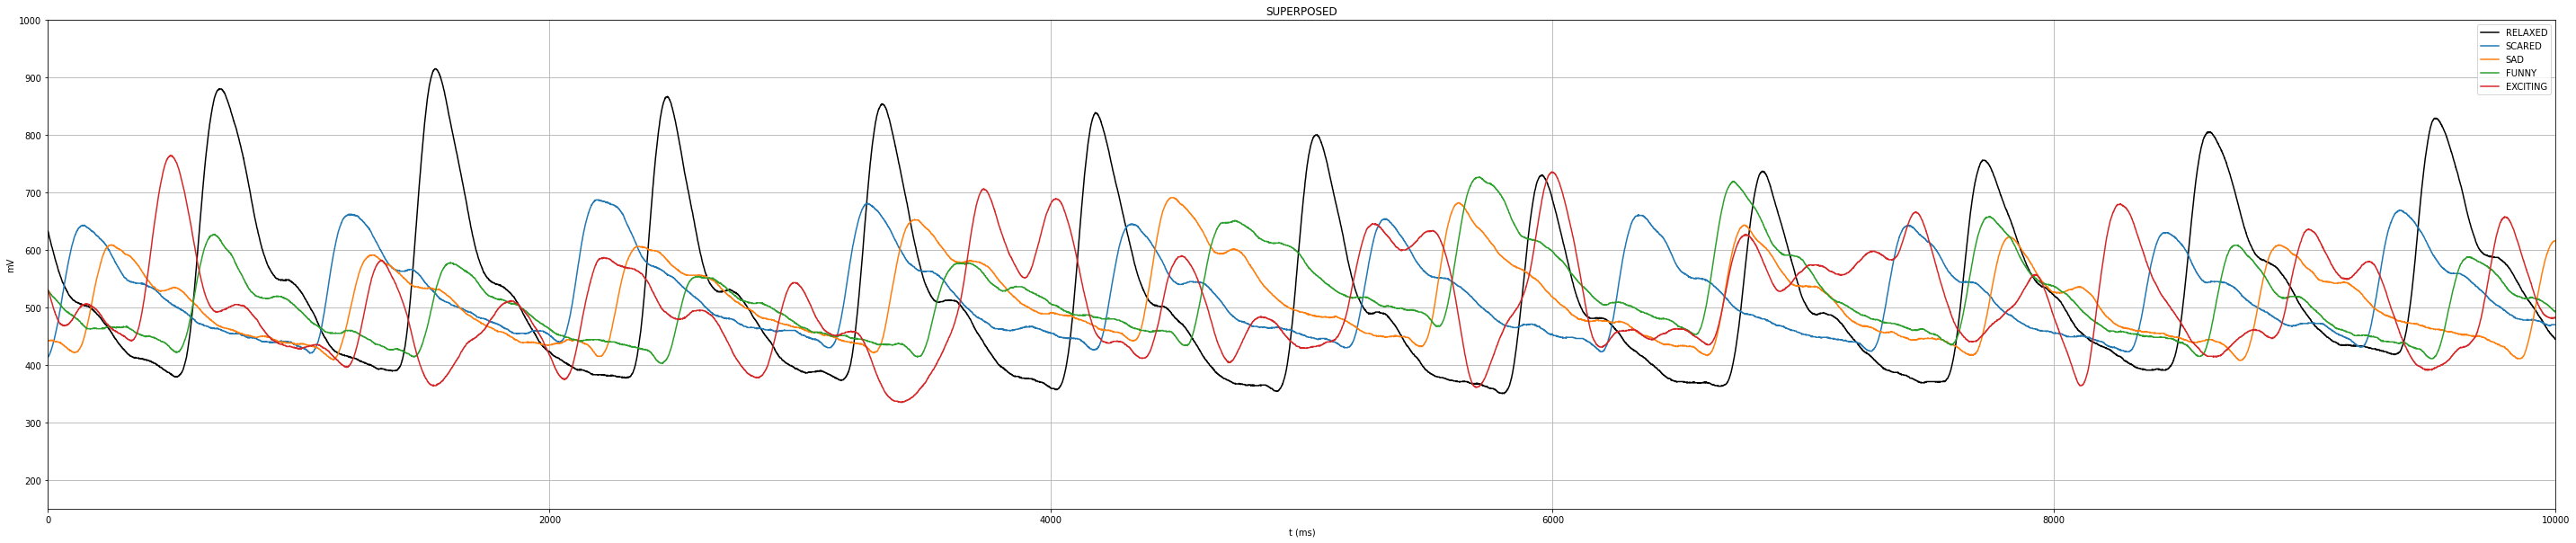

In [ ]:
plt.figure(figsize=(50,10)) #setting plot window
plt.plot(np.array(range(len(sensors[3][0:10001]))),sensors[3][0:10001],'k', label='RELAXED') #BLACK
plt.plot(np.array(range(len(sensors[3][first:first+10001]))),sensors[3][first:first+10001],label='SCARED') #BLUE
plt.plot(np.array(range(len(sensors[3][first*2:first*2+10001]))),sensors[3][first*2:first*2+10001],label='SAD') #ORANGE
plt.plot(np.array(range(len(sensors[3][first*3:first*3+10001]))),sensors[3][first*3:first*3+10001],label='FUNNY') #GREEN
plt.plot(np.array(range(len(sensors[3][first*4:first*4+10001]))),sensors[3][first*4:first*4+10001],label='EXCITING') # PINK
plt.ylim([150,1000])
plt.ylabel('mV')
plt.xlabel('t (ms)')
plt.grid(True)
plt.xlim([0,10000]) #only show 10 seconds
plt.title('SUPERPOSED')
plt.legend()
plt.show()

### EDA

**RELAXED**

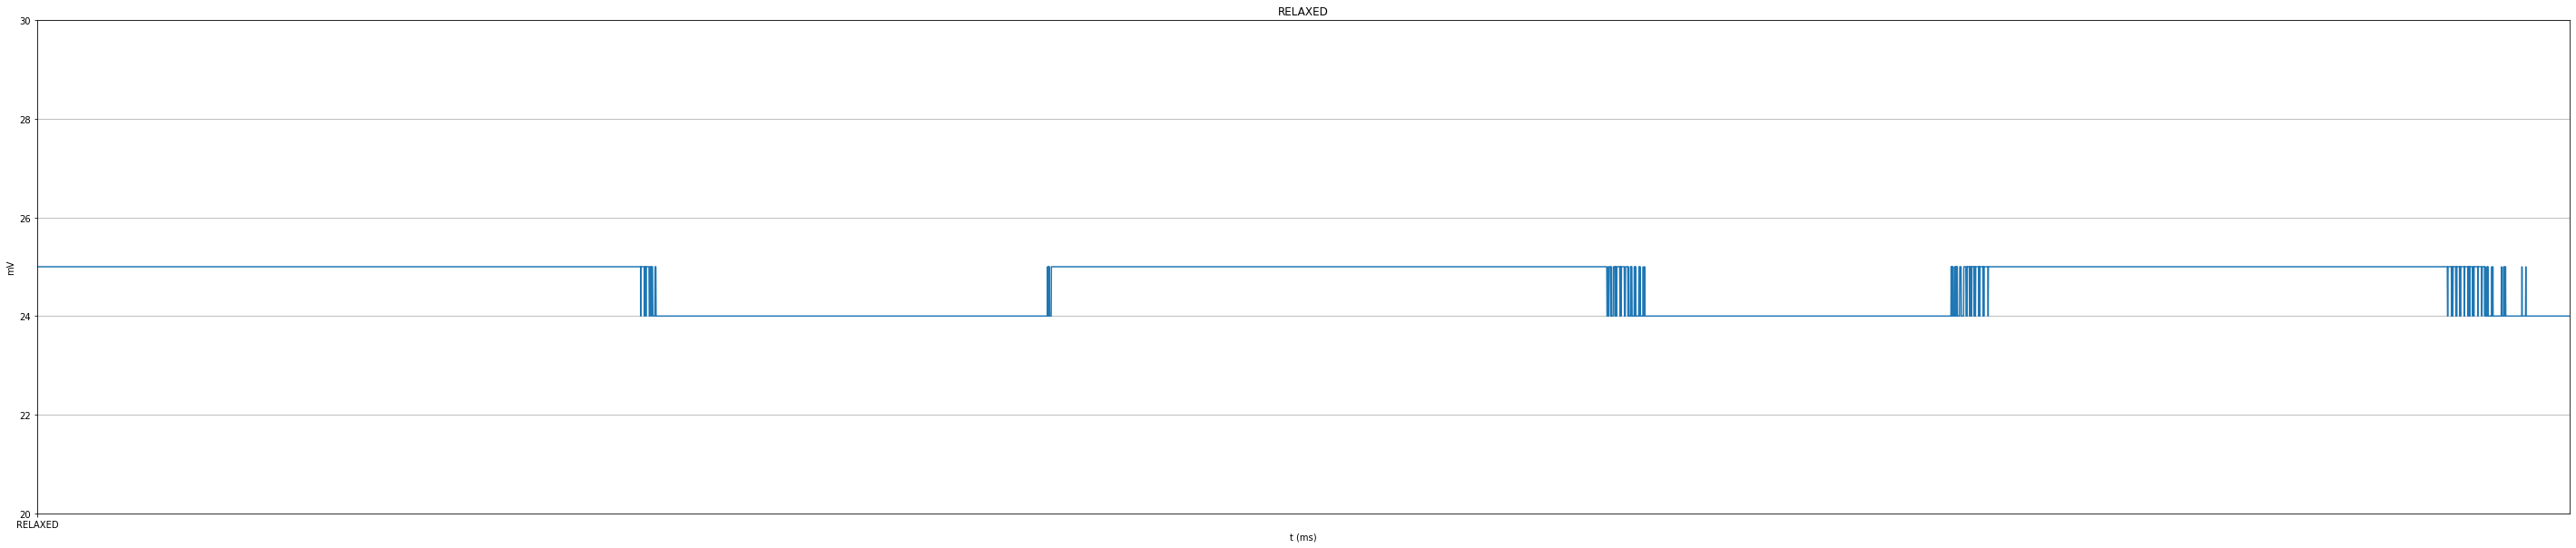

In [ ]:
plt.figure(figsize=(50,10)) #setting plot window
plt.plot(np.array(range(len(sensors[4]))),sensors[4])
plt.ylim([20,30])
plt.ylabel('mV')
plt.xlabel('t (ms)')
plt.grid(True)
plt.xticks([0, first, first*2, first*3, first*4], ["RELAXED", "SCARED", "SAD", "FUNNY", "EXCITING"])
plt.xlim([0,10000]) #only show 10 seconds
plt.title('RELAXED')
plt.show()

We can't really draw any conclusions from 10 seconds. That means that when sampling after we will have to consider longer intervals.

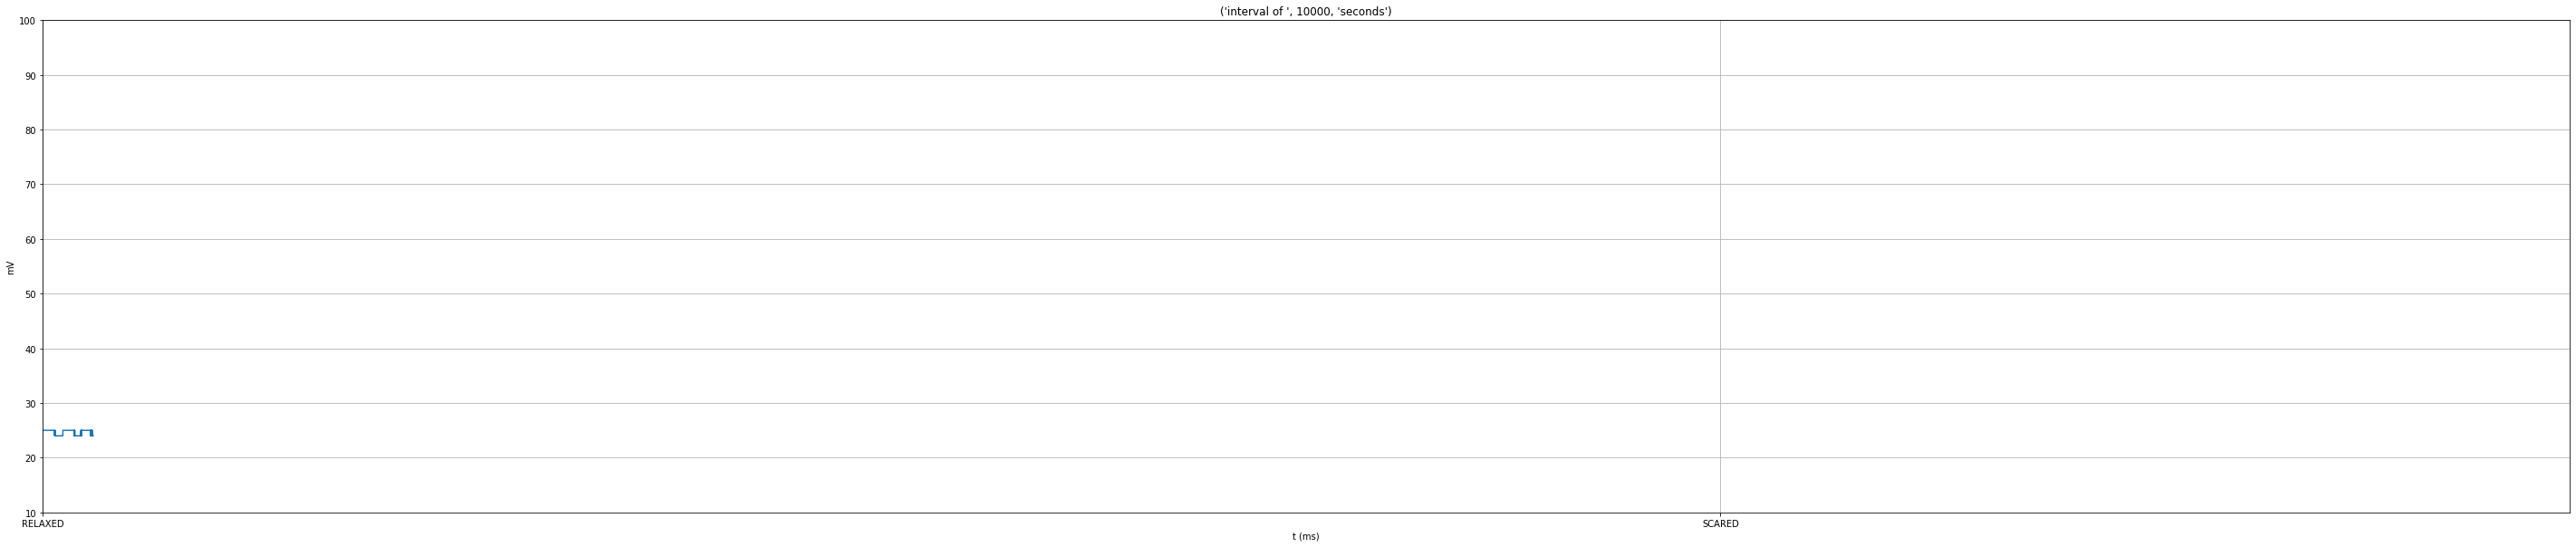

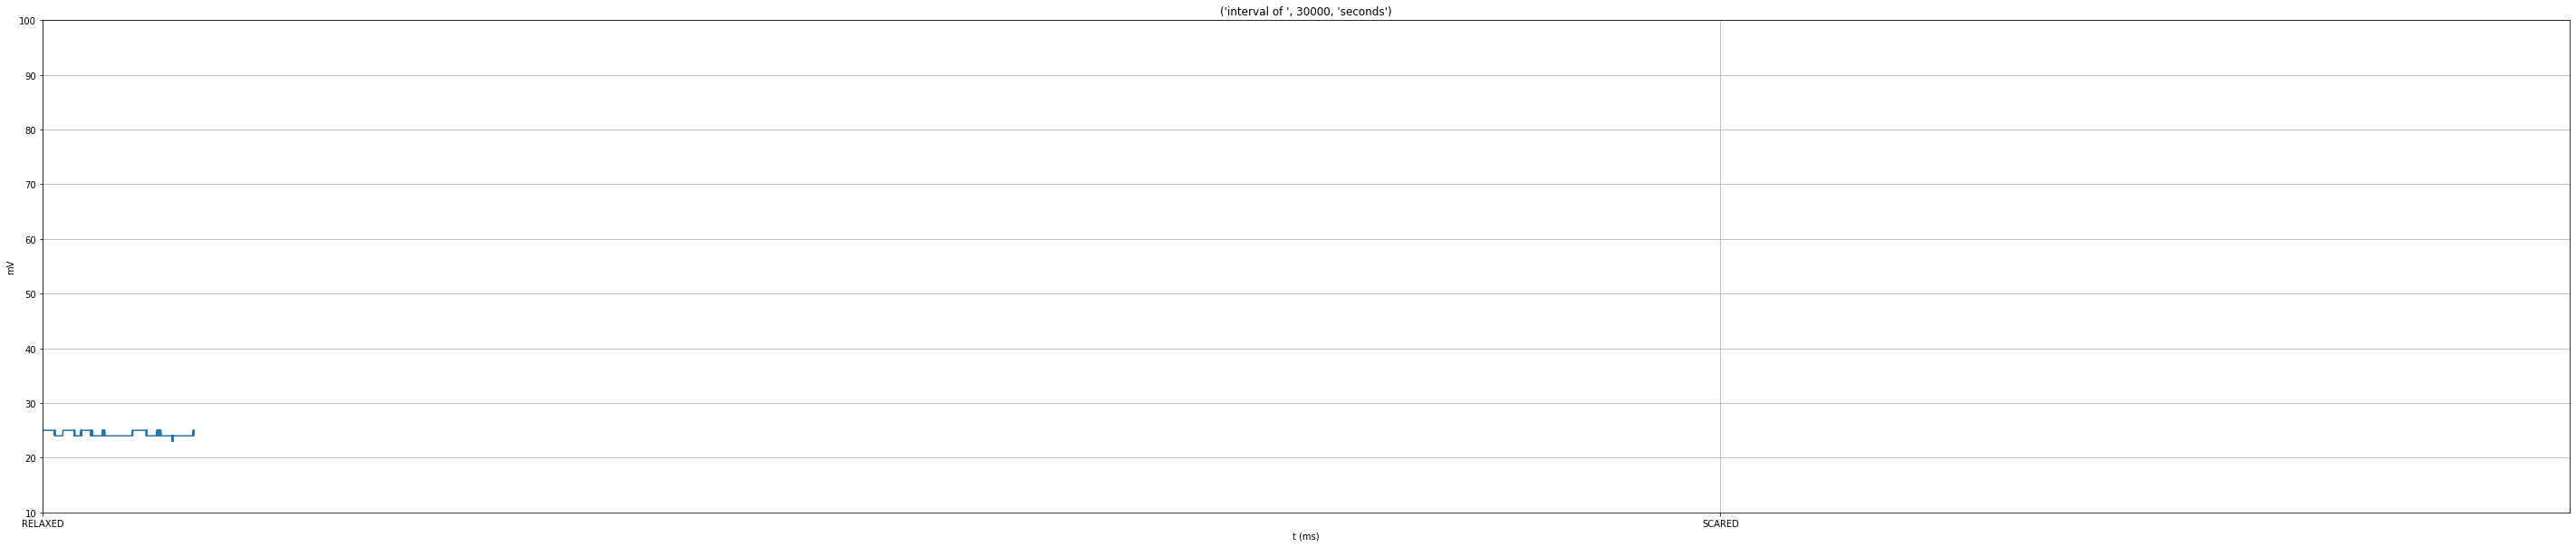

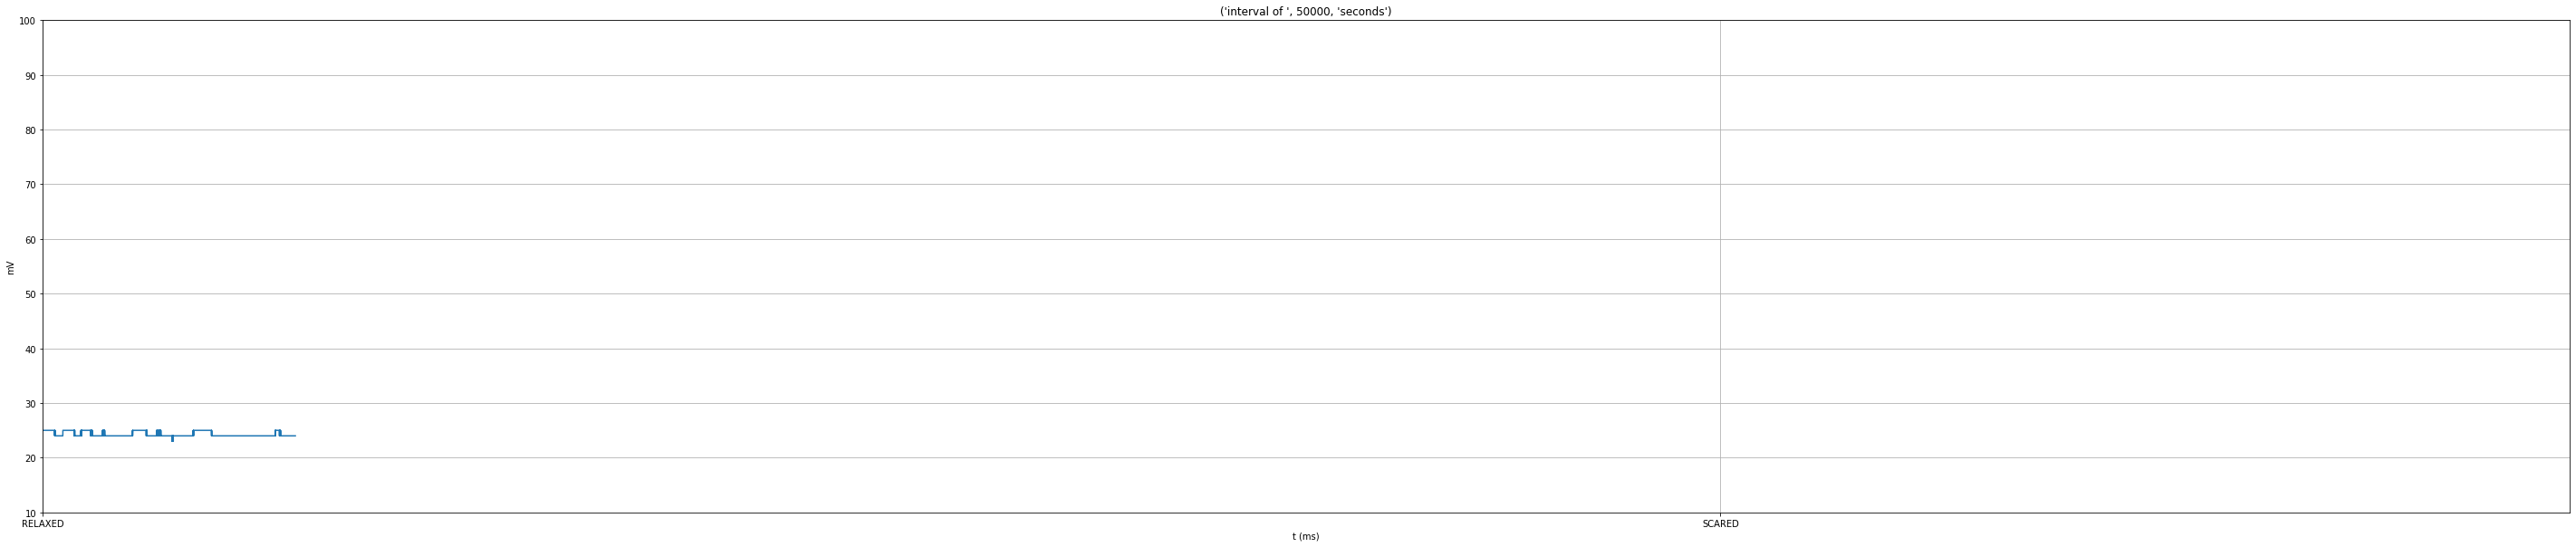

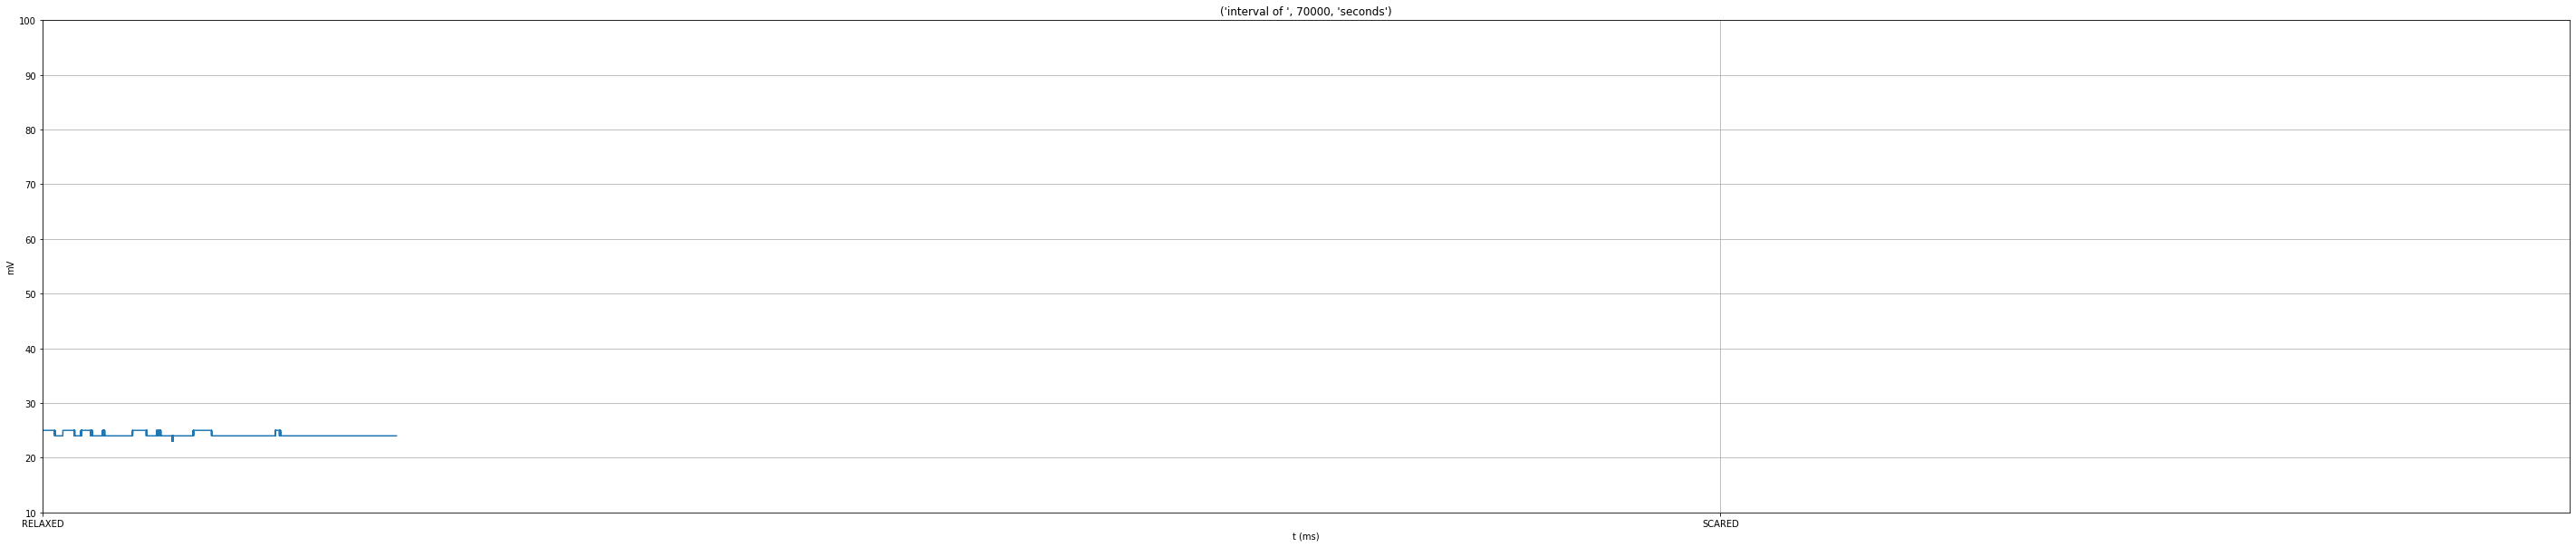

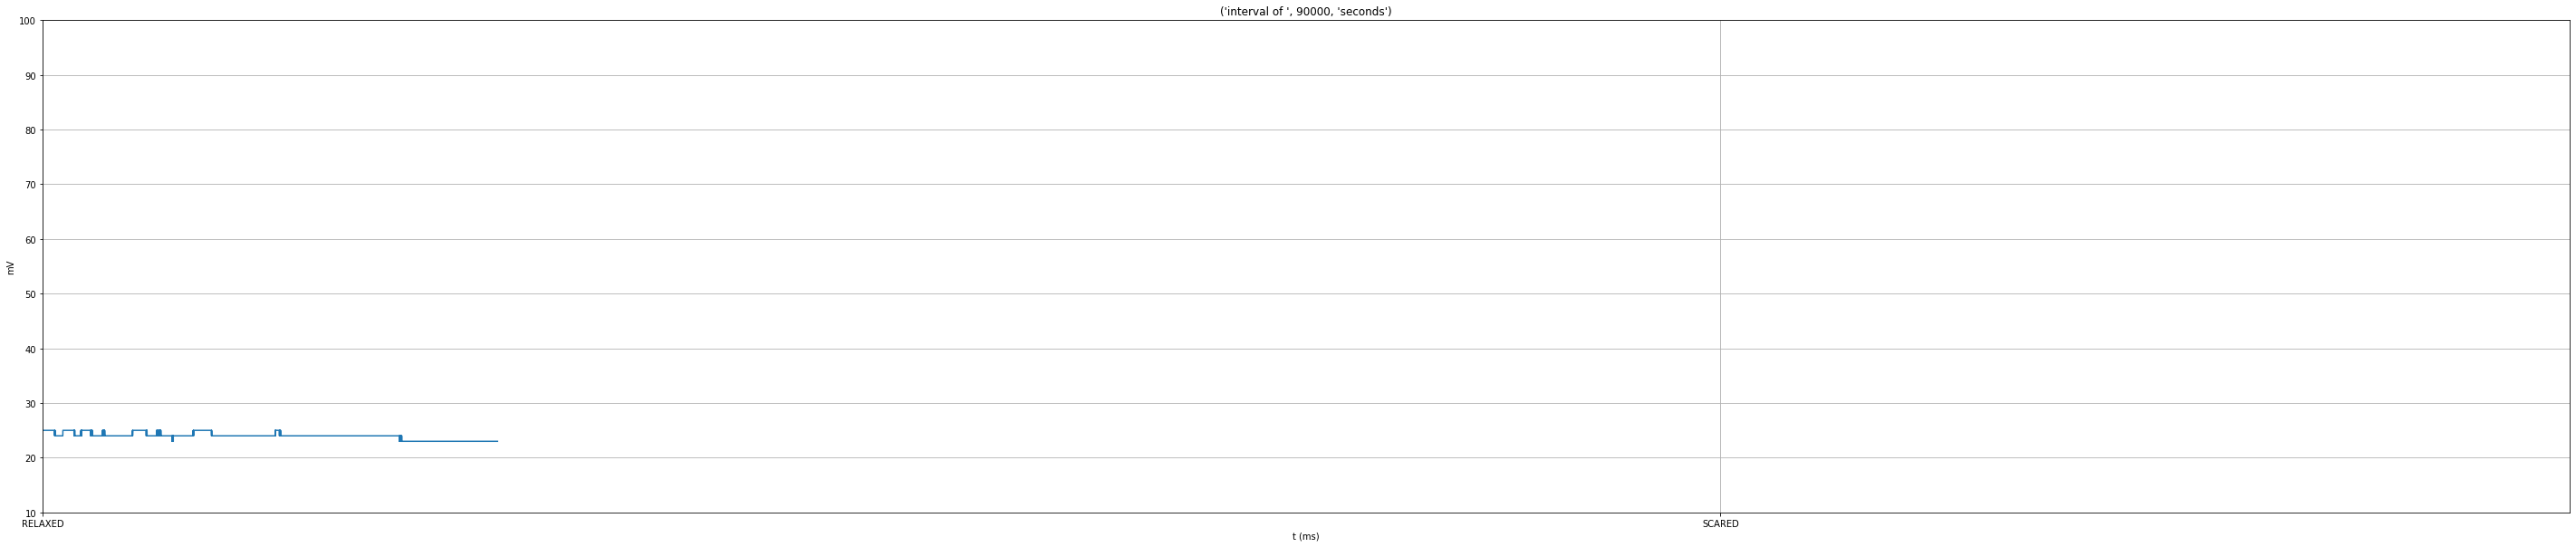

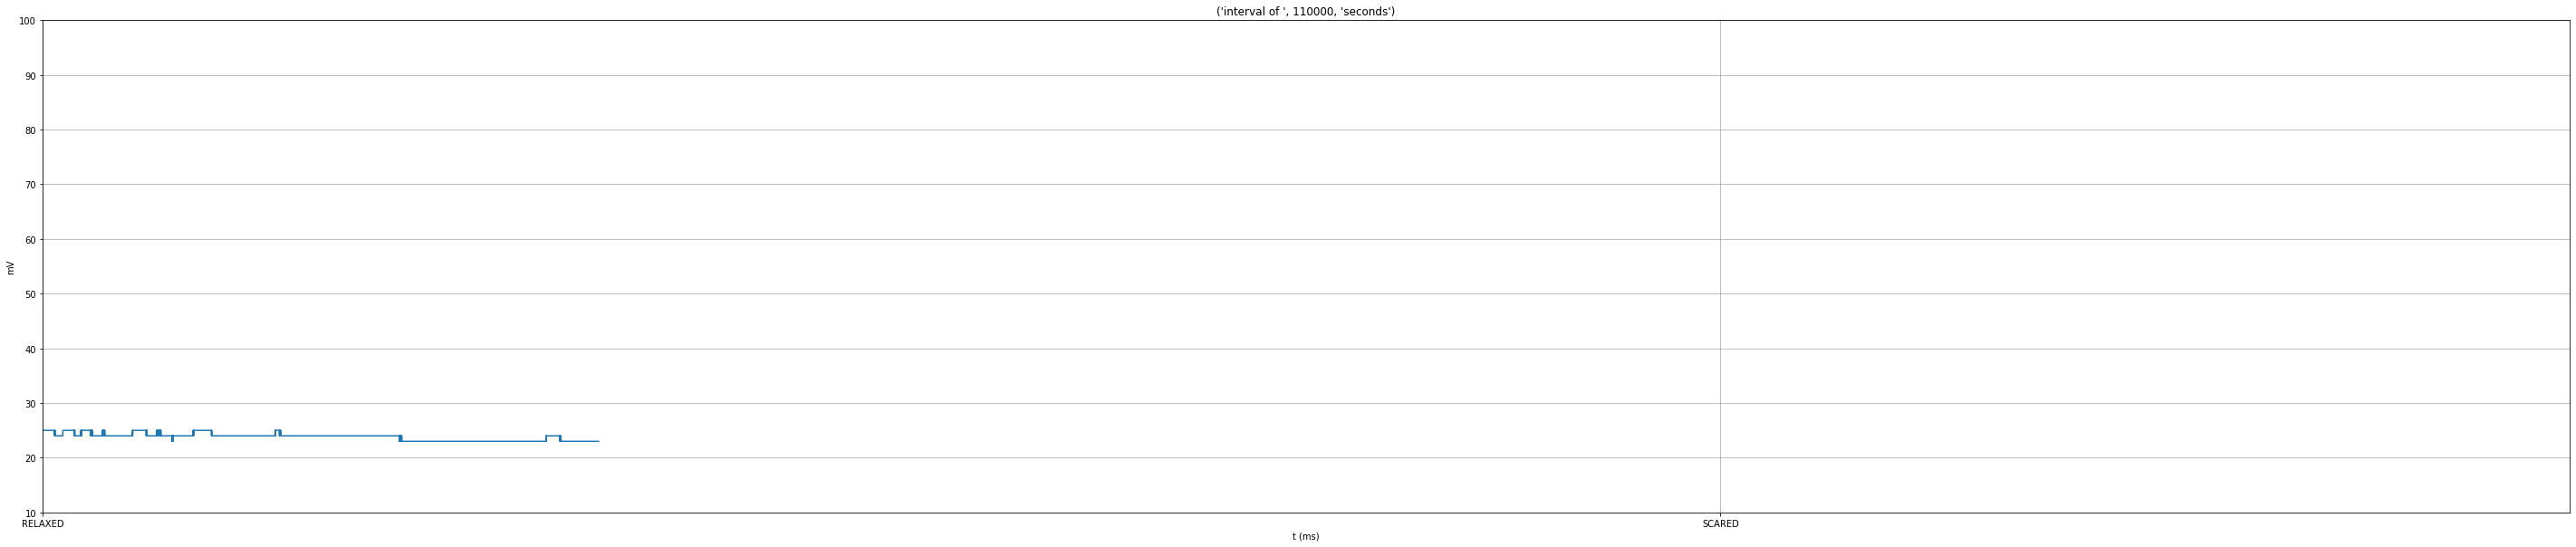

In [ ]:
# testing for different intervals, starting from 10 seconds to 120 seconds 
for i in range(1,13,2): 
  plt.figure(figsize=(50,10)) #setting plot window
  plt.plot(np.array(range(len(sensors[4][0:i*10000]))),sensors[4][0:i*10000])
  plt.ylim([10,100])
  plt.ylabel('mV')
  plt.xlabel('t (ms)')
  plt.grid(True)
  plt.xticks([0, first, first*2, first*3, first*4], ["RELAXED", "SCARED", "SAD", "FUNNY", "EXCITING"])
  plt.xlim([0,500000]) 
  t = 'interval of ', i*10 , 'seconds'
  plt.title(t)
  plt.show()

We start to eyeball a slope for 50 seconds
So now we look at 50 seconds intervals

Smoothing out the curve:

**RELAXED**

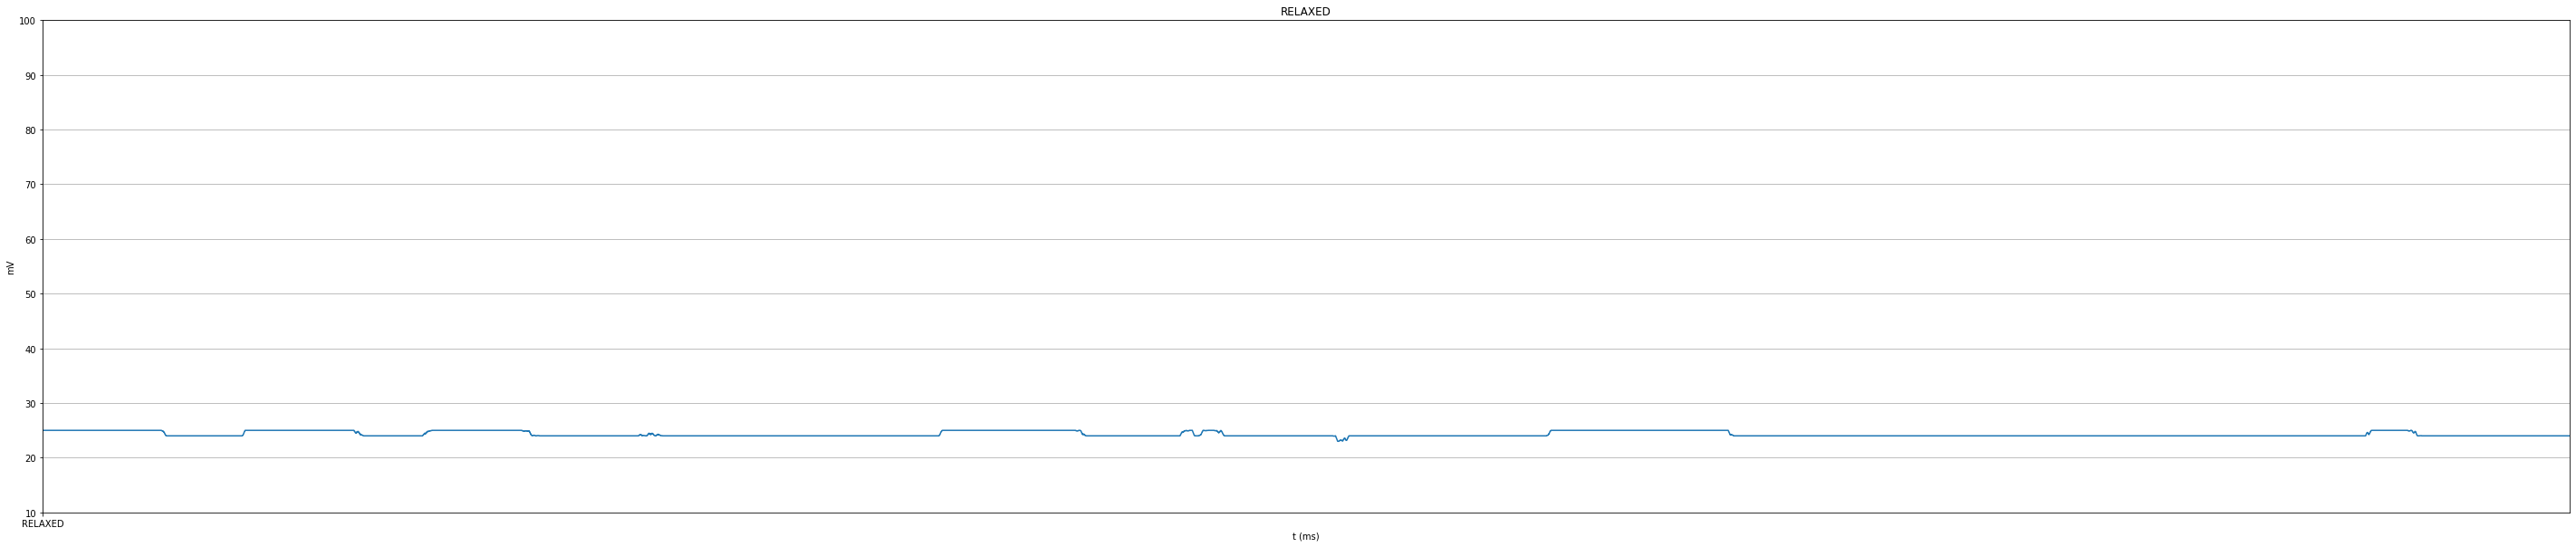

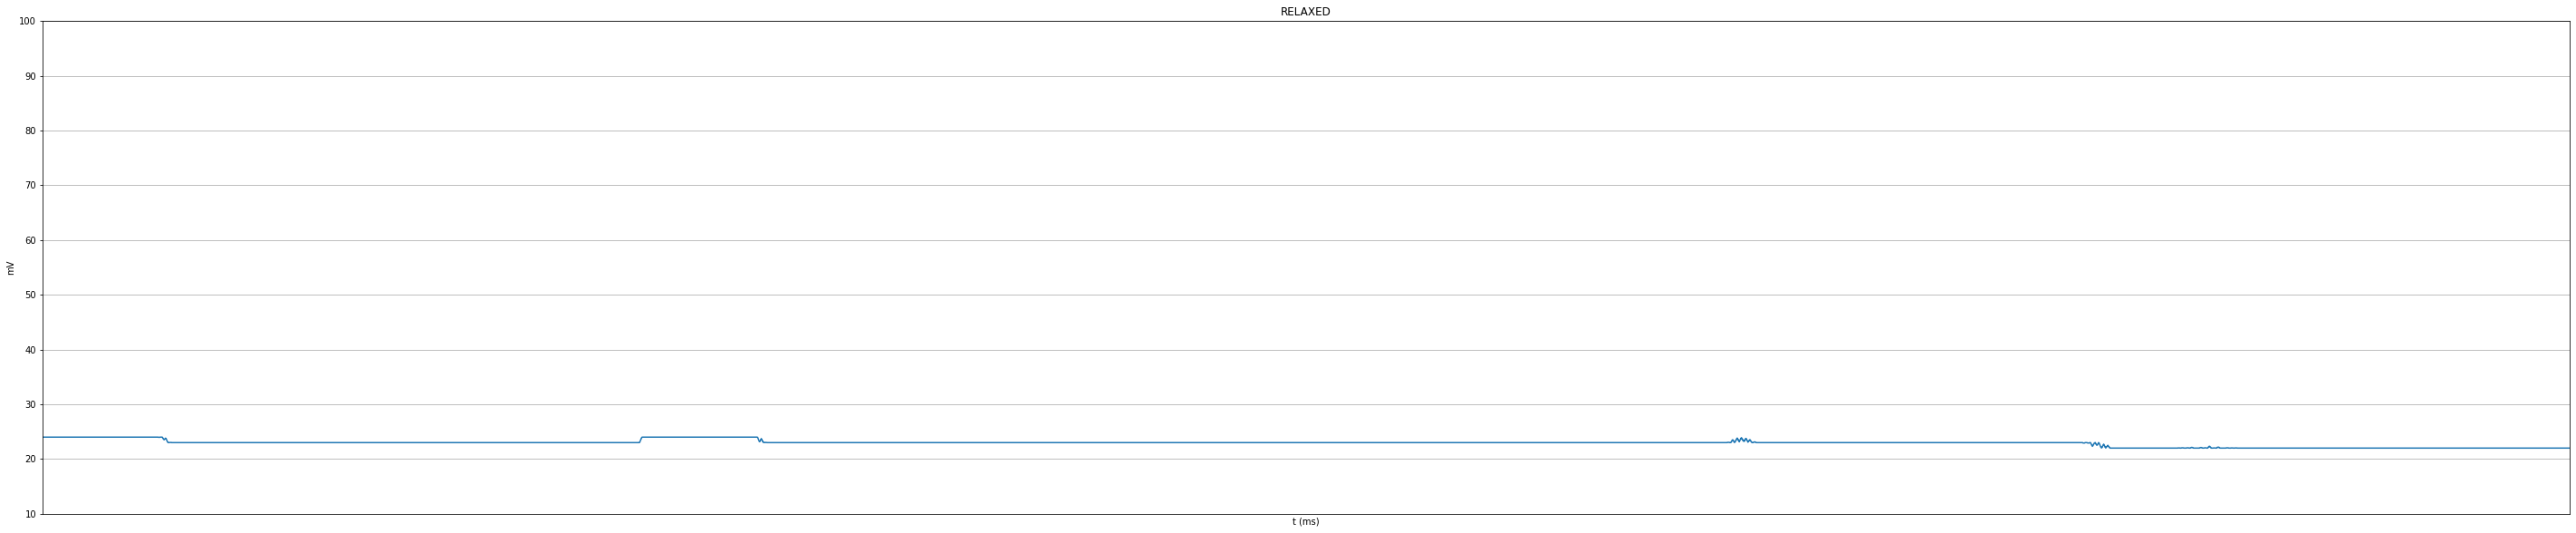

In [ ]:
for i in [0,100000]:

  plt.figure(figsize=(50,10)) #setting plot window
  plt.plot(np.array(range(len(moving_average(sensors[4],40)))),moving_average(sensors[4],40))
  #plt.plot(np.array(range(len(sensors[4]))),sensors[4])
  plt.ylim([10,100])
  plt.ylabel('mV')
  plt.xlabel('t (ms)')
  plt.grid(True)
  plt.xticks([0, first, first*2, first*3, first*4], ["RELAXED", "SCARED", "SAD", "FUNNY", "EXCITING"])
  plt.xlim([i,i+50000]) #only show 50 seconds
  plt.title('RELAXED')
  plt.show()

**SCARED**

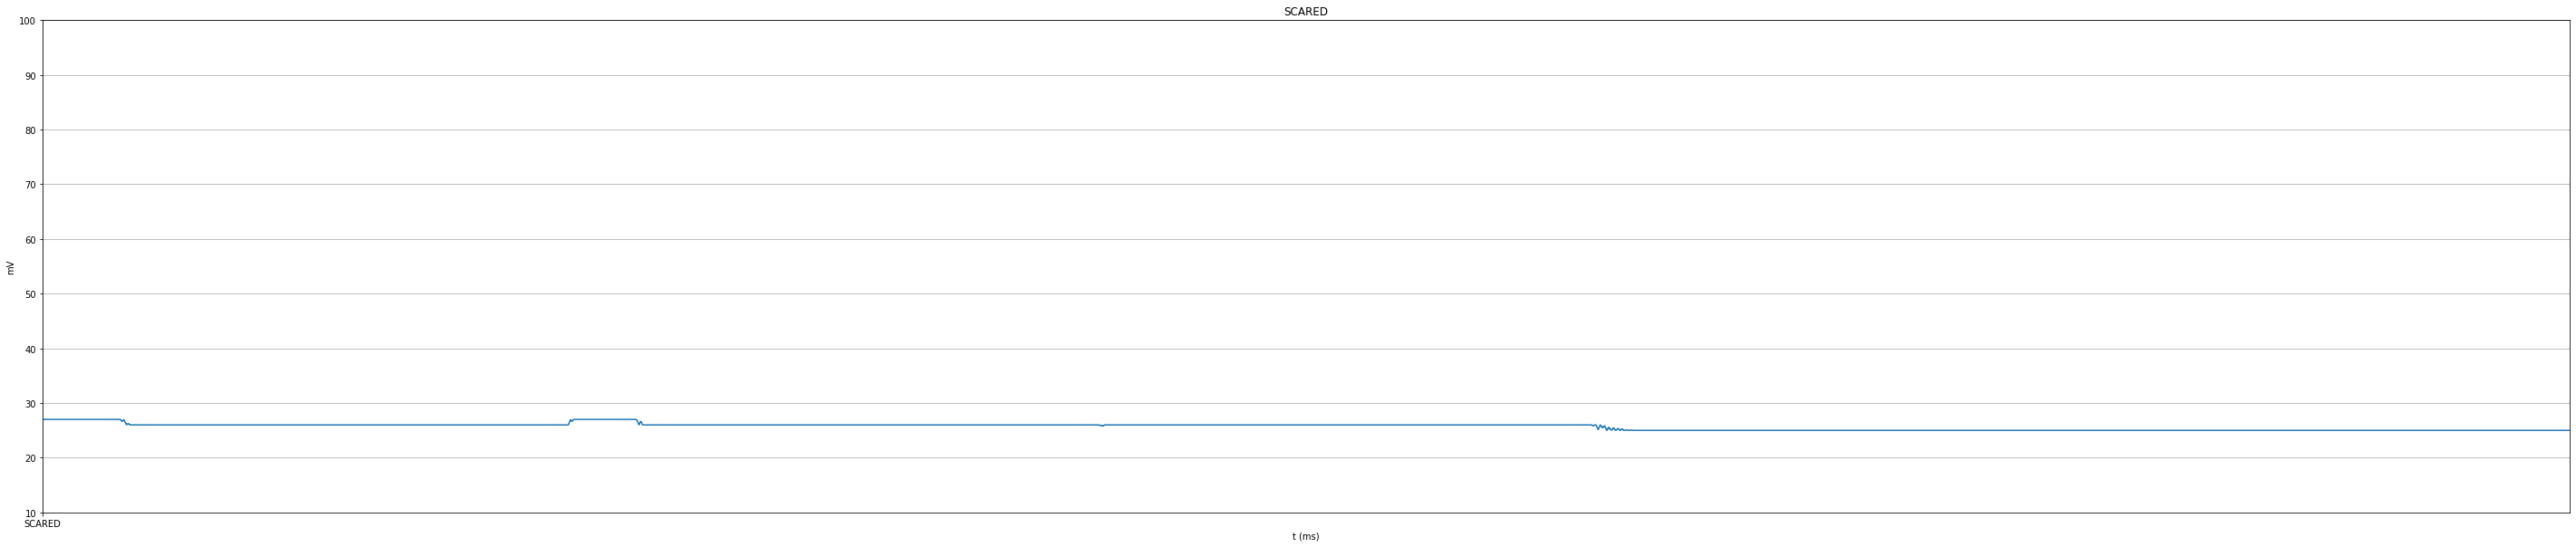

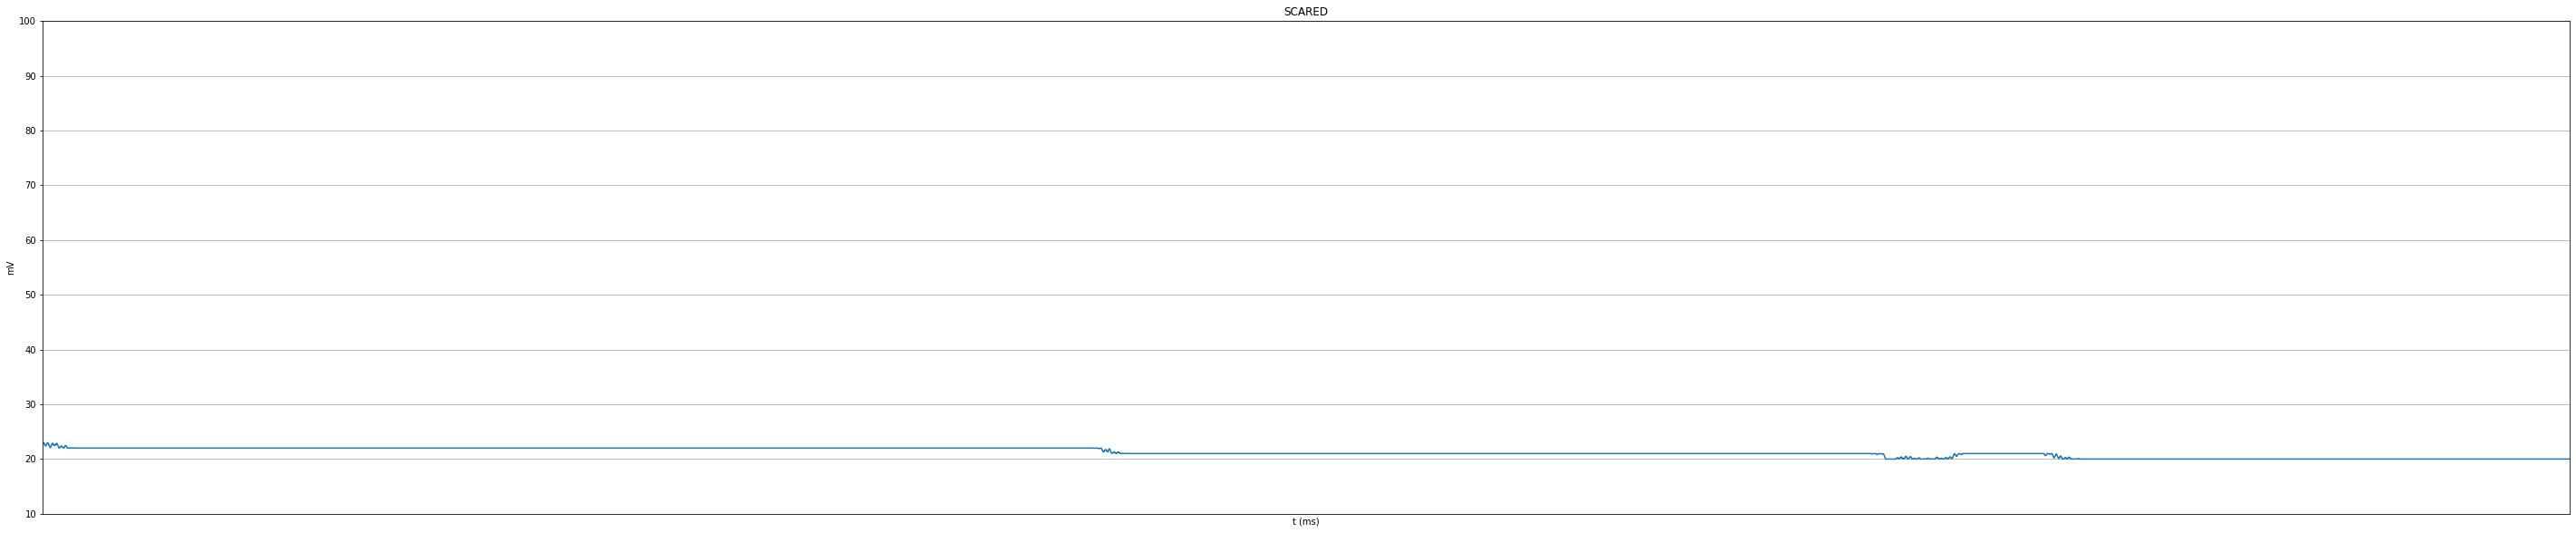

In [ ]:
for i in [first,first + 100000]:

  plt.figure(figsize=(50,10)) #setting plot window
  plt.plot(np.array(range(len(moving_average(sensors[4],40)))),moving_average(sensors[4],40))
  #plt.plot(np.array(range(len(sensors[4]))),sensors[4])
  plt.ylim([10,100])
  plt.ylabel('mV')
  plt.xlabel('t (ms)')
  plt.grid(True)
  plt.xticks([0, first, first*2, first*3, first*4], ["RELAXED", "SCARED", "SAD", "FUNNY", "EXCITING"])
  plt.xlim([i,i+50000]) #only show 50 seconds
  plt.title('SCARED')
  plt.show()

I went back to the total graph and realized we have a lot more information in a 2.5min interval so plotting that:

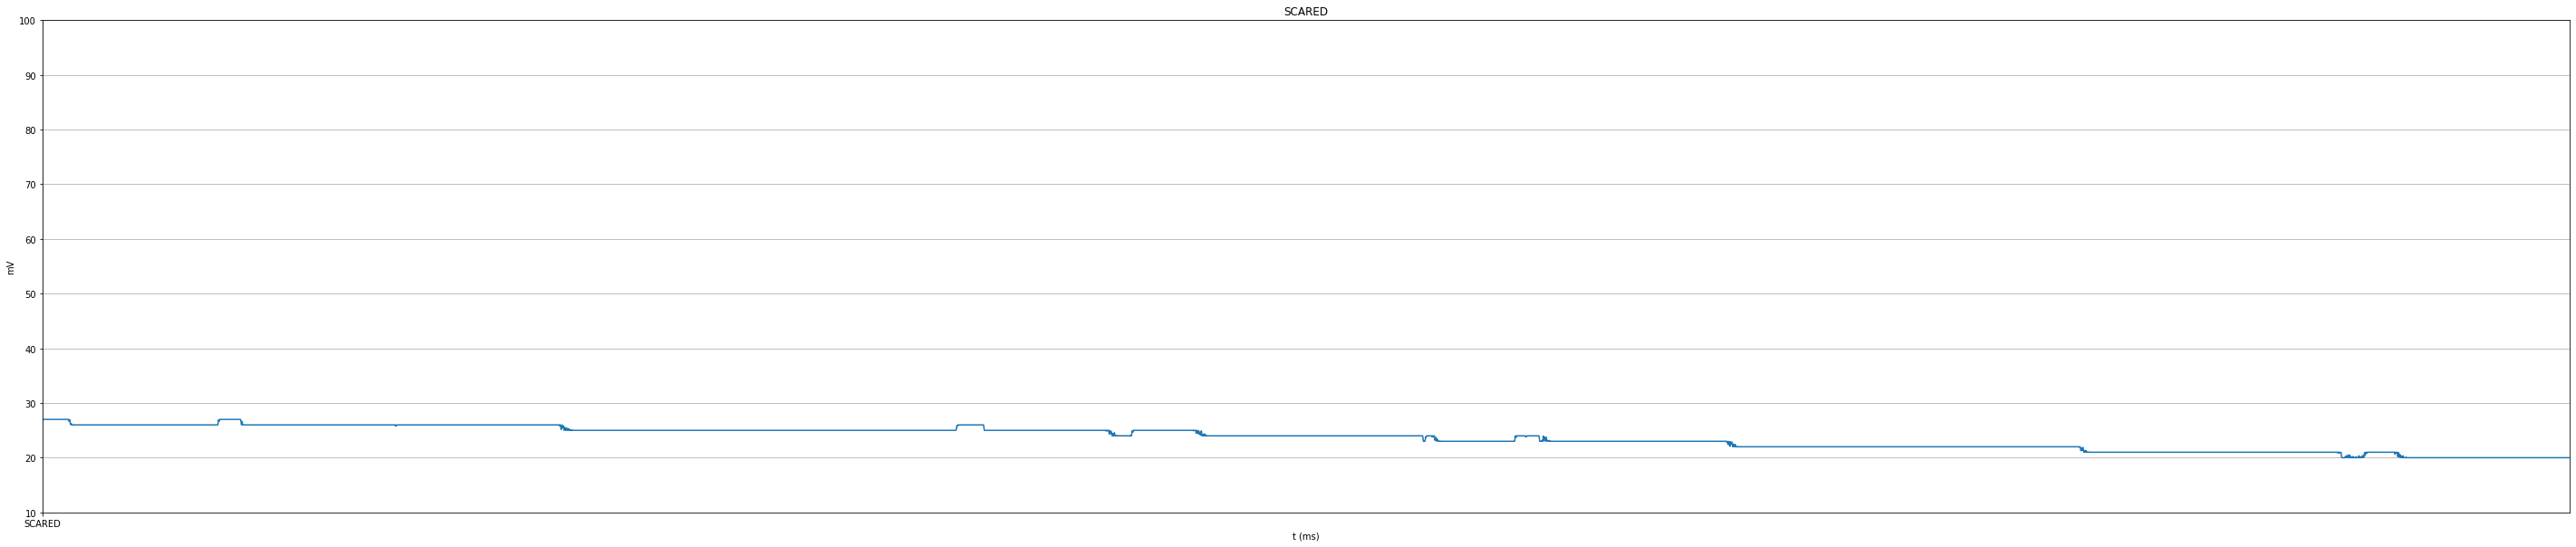

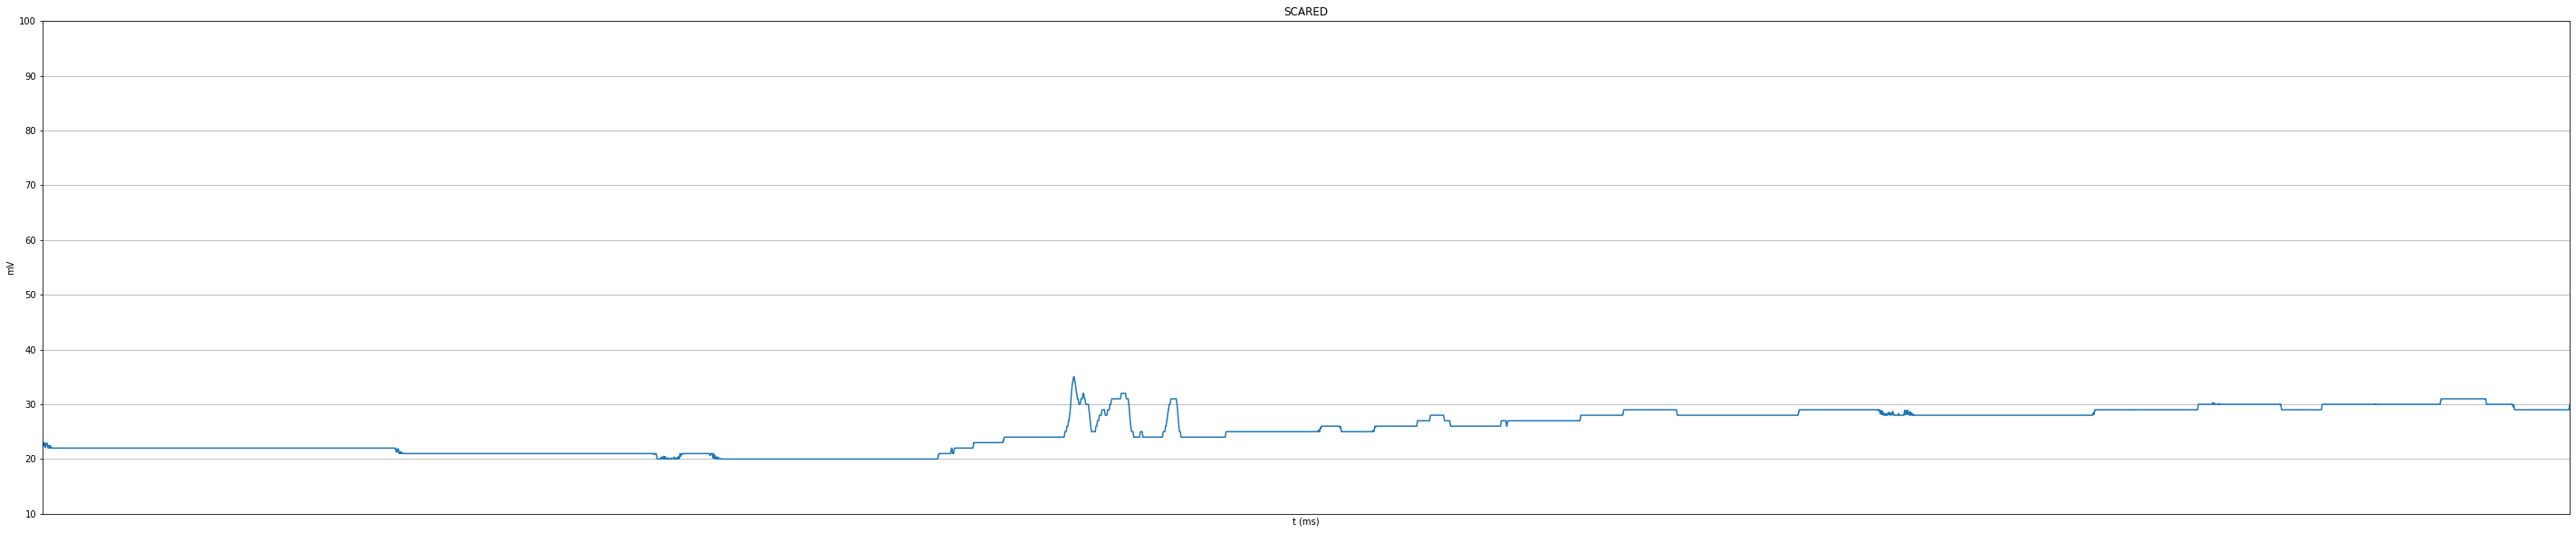

In [ ]:
for i in [first,first + 100000]:

  plt.figure(figsize=(50,10)) #setting plot window
  plt.plot(np.array(range(len(moving_average(sensors[4],40)))),moving_average(sensors[4],40))
  #plt.plot(np.array(range(len(sensors[4]))),sensors[4])
  plt.ylim([10,100])
  plt.ylabel('mV')
  plt.xlabel('t (ms)')
  plt.grid(True)
  plt.xticks([0, first, first*2, first*3, first*4], ["RELAXED", "SCARED", "SAD", "FUNNY", "EXCITING"])
  plt.xlim([i,i+150000]) # plotting 2.5 min  
  plt.title('SCARED')
  plt.show()

**SAD**

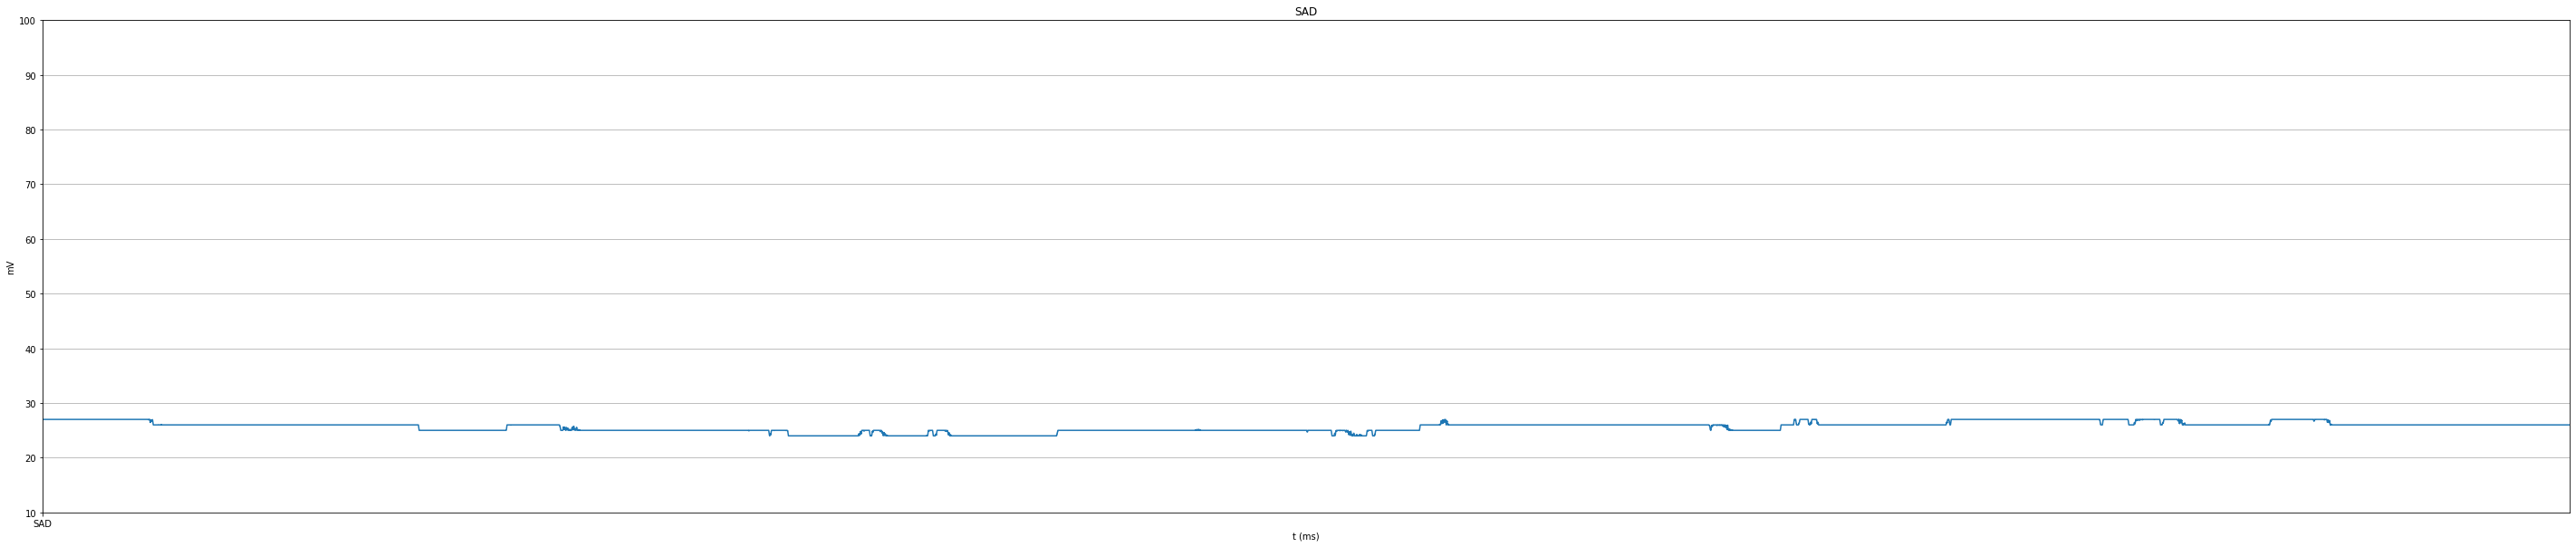

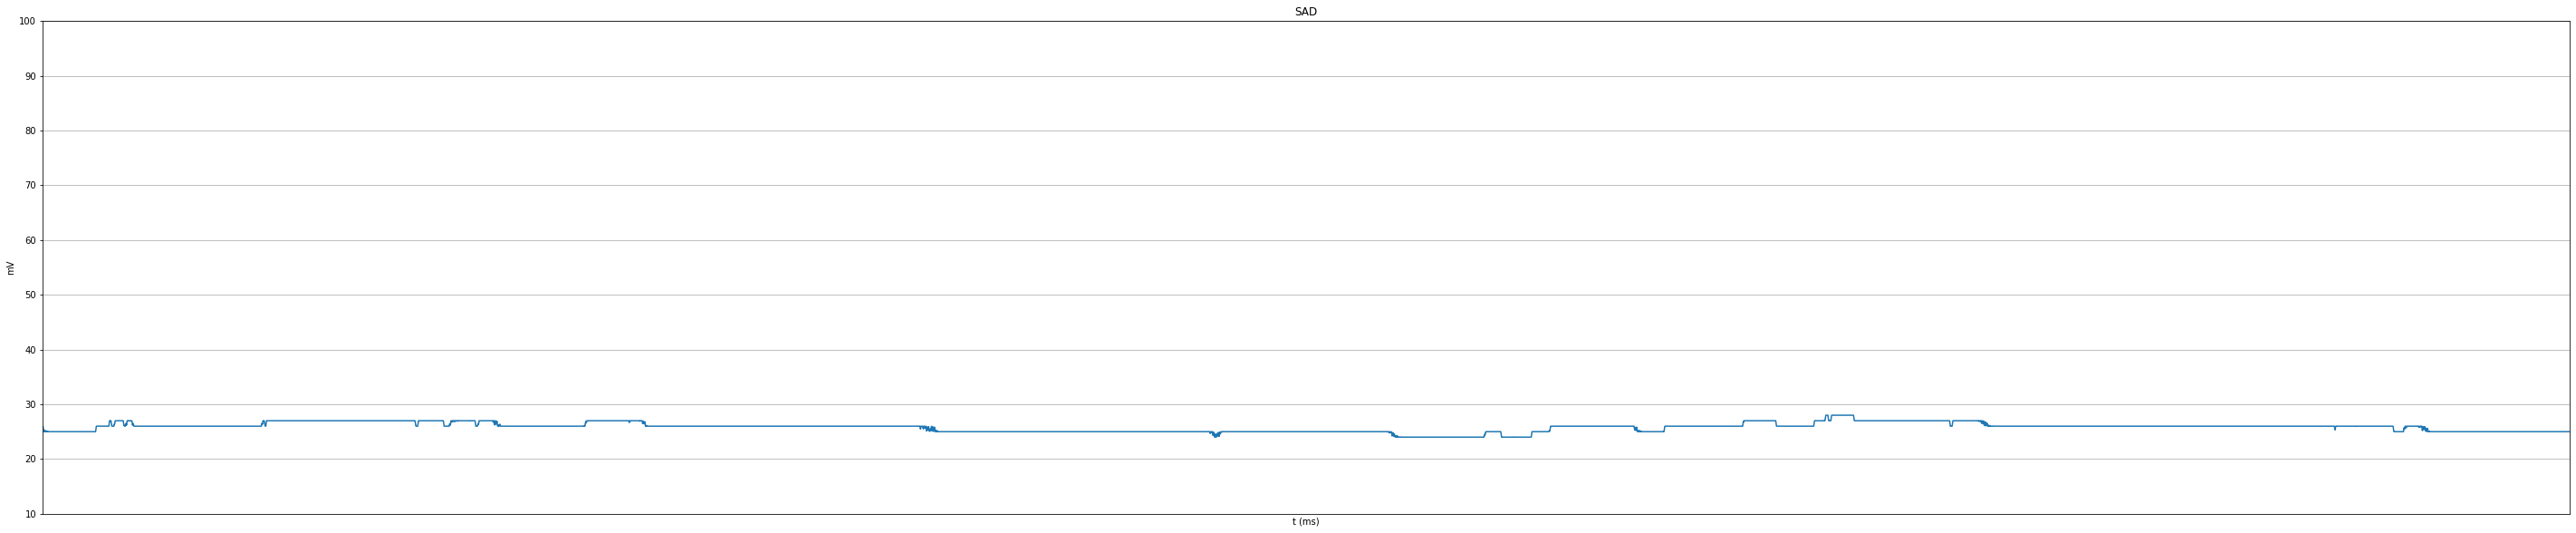

In [ ]:
for i in [2*first,2*first + 100000]:

  plt.figure(figsize=(50,10)) #setting plot window
  plt.plot(np.array(range(len(moving_average(sensors[4],40)))),moving_average(sensors[4],40))
  #plt.plot(np.array(range(len(sensors[4]))),sensors[4])
  plt.ylim([10,100])
  plt.ylabel('mV')
  plt.xlabel('t (ms)')
  plt.grid(True)
  plt.xticks([0, first, first*2, first*3, first*4], ["RELAXED", "SCARED", "SAD", "FUNNY", "EXCITING"])
  plt.xlim([i,i+150000]) # plotting 2.5 min  
  plt.title('SAD')
  plt.show()

**FUNNY**

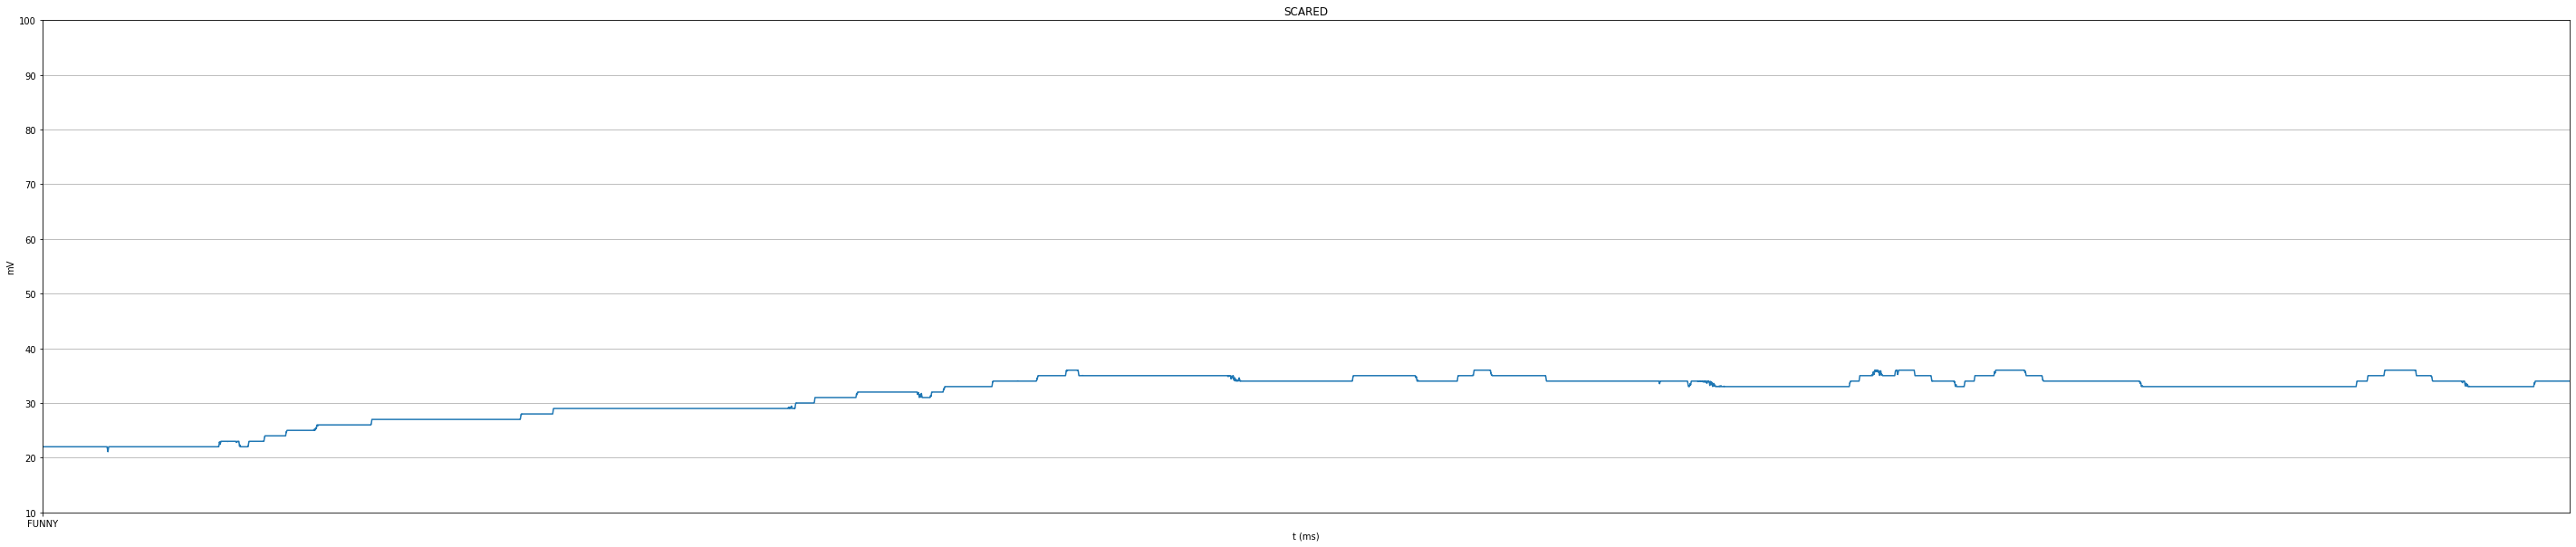

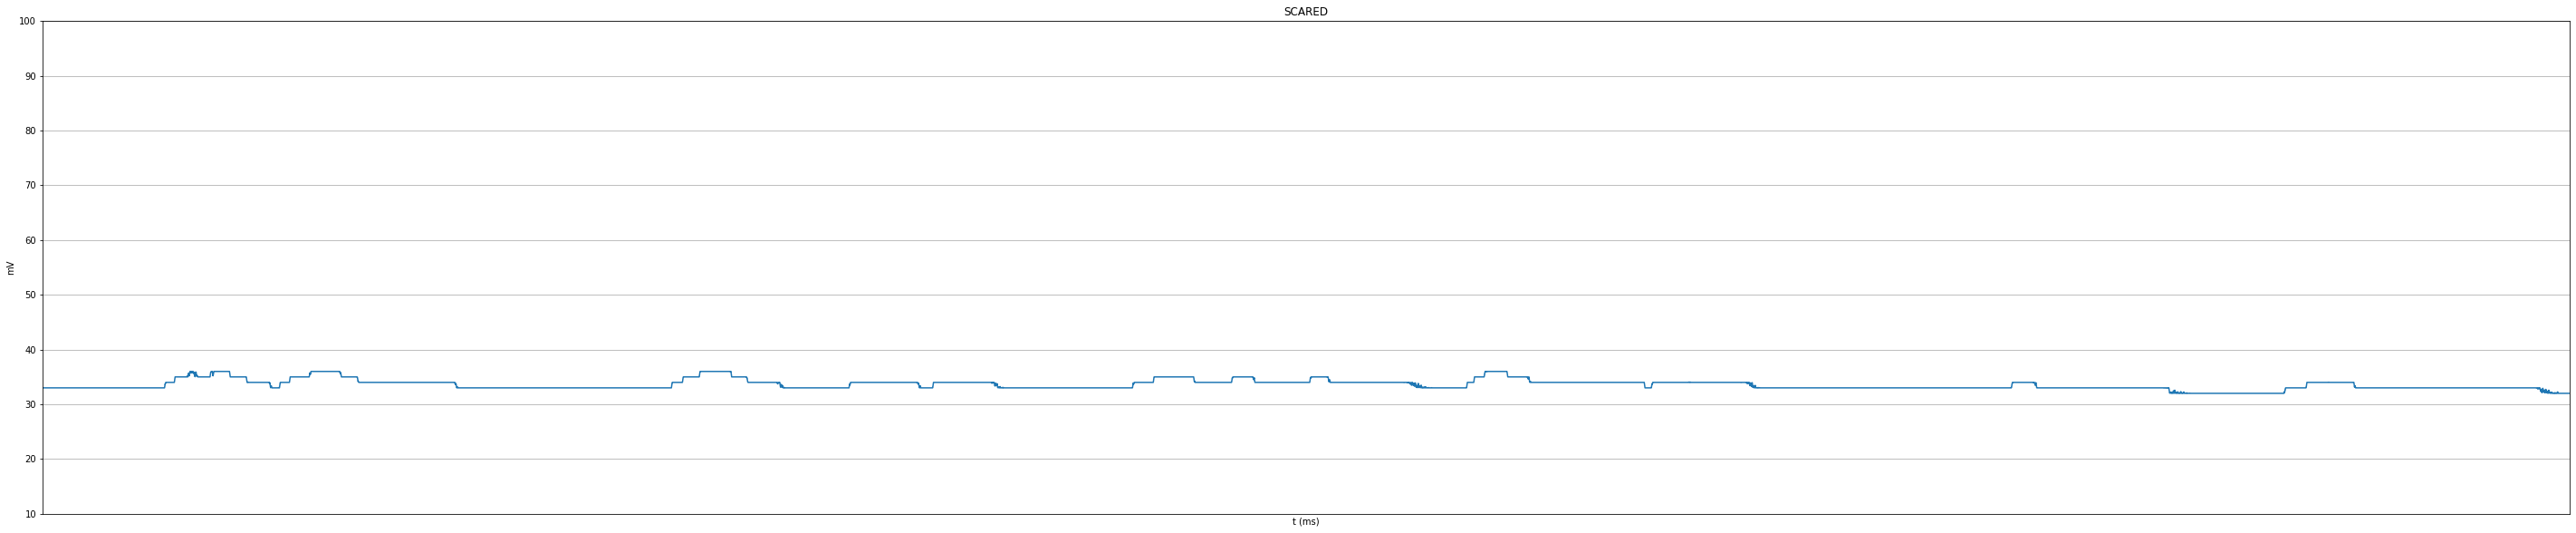

In [ ]:
for i in [3*first,3*first + 100000]:

  plt.figure(figsize=(50,10)) #setting plot window
  plt.plot(np.array(range(len(moving_average(sensors[4],40)))),moving_average(sensors[4],40))
  #plt.plot(np.array(range(len(sensors[4]))),sensors[4])
  plt.ylim([10,100])
  plt.ylabel('mV')
  plt.xlabel('t (ms)')
  plt.grid(True)
  plt.xticks([0, first, first*2, first*3, first*4], ["RELAXED", "SCARED", "SAD", "FUNNY", "EXCITING"])
  plt.xlim([i,i+150000]) # plotting 2.5 min  
  plt.title('FUNNY')
  plt.show()

**EXCITING**

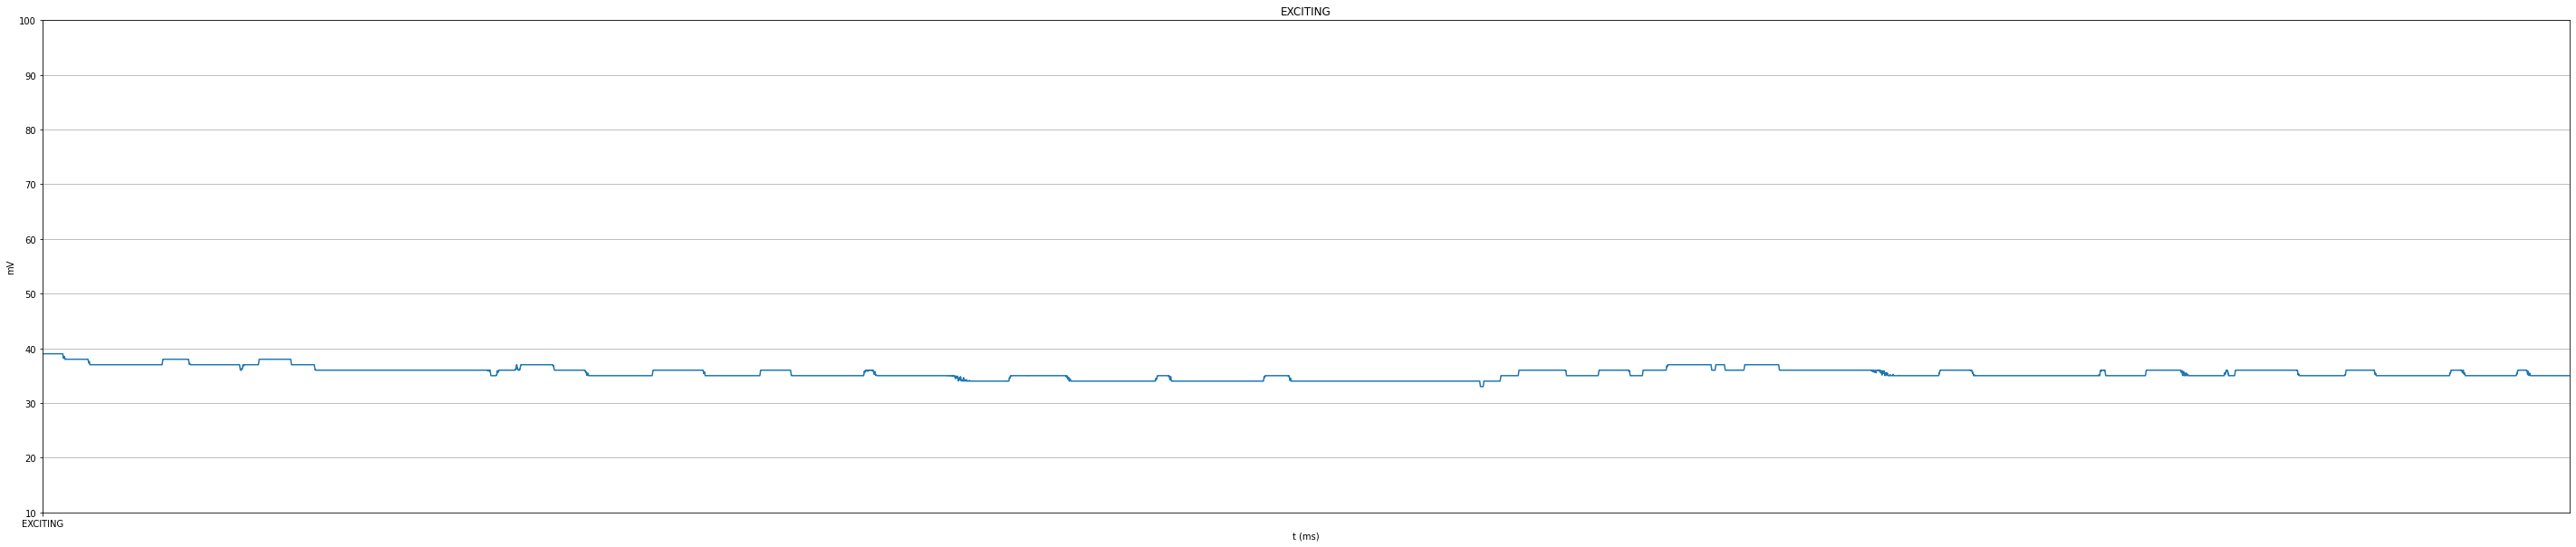

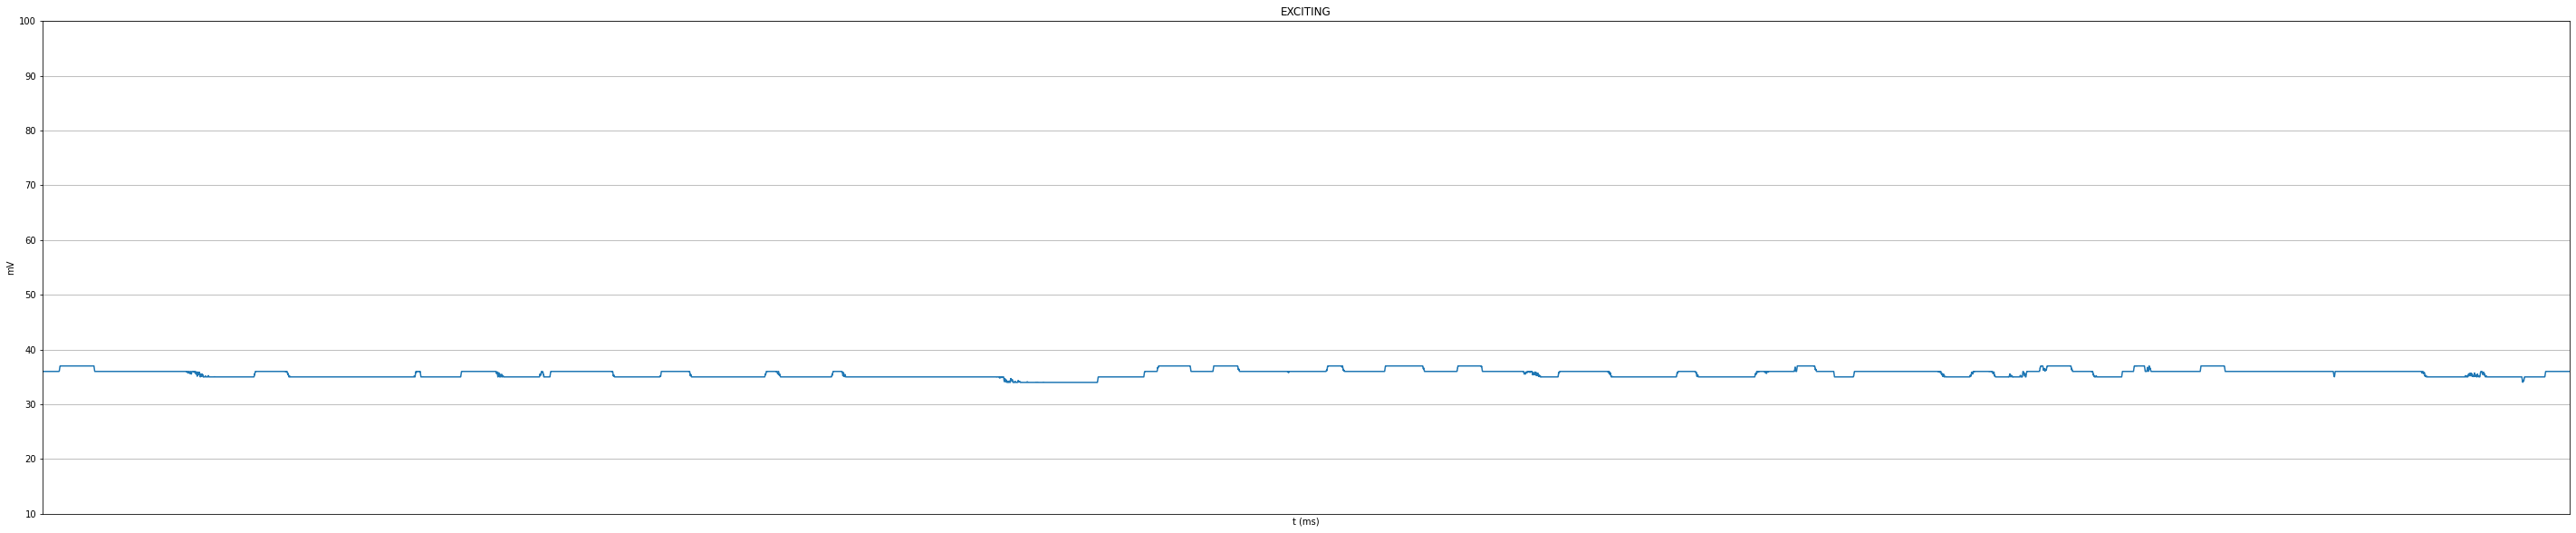

In [ ]:
for i in [4*first,4*first + 100000]:

  plt.figure(figsize=(50,10)) #setting plot window
  plt.plot(np.array(range(len(moving_average(sensors[4],40)))),moving_average(sensors[4],40))
  #plt.plot(np.array(range(len(sensors[4]))),sensors[4])
  plt.ylim([10,100])
  plt.ylabel('mV')
  plt.xlabel('t (ms)')
  plt.grid(True)
  plt.xticks([0, first, first*2, first*3, first*4], ["RELAXED", "SCARED", "SAD", "FUNNY", "EXCITING"])
  plt.xlim([i,i+150000]) # plotting 2.5 min  
  plt.title('EXCITING')
  plt.show()